# Coupon Recommendation System

**Description**: Development of a Coupon Management System based on Geolocation and Customer Preferences to Optimize Marketing Campaigns in Hospitality Establishments..<br>
**Date**: 08/03/2024<br>
**Data Source**: https://www.kaggle.com/datasets/mathurinache/invehicle-coupon-recommendation


# 1. Data loading

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
file_path = "DB-2A/in-vehicle-coupon-recommendation.csv"
data_original = pd.read_csv(file_path, sep=';')

In [16]:
df = data_original.copy()

In [17]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Objetive


A key objective is to maximize the acceptance of coupons by users. This will not only increase the value that will be offered to customers (companies promoting their products or services through coupons), but will also enhance the end consumer's experience, ensuring that they receive offers that are of interest and relevance to them. To achieve this goal, it is crucial to understand the factors that influence users' decision to accept a coupon and how we can use this information to fine-tune marketing strategies.

# Variables description

### Demographic information

* Age: Provides information about the driver's age range, which may influence his or her consumption preferences and willingness to accept certain types of coupons.
* Gender: The driver's gender can affect product or service preferences, and thus coupon acceptance.
* Marital Status: Marital status may reflect different consumption patterns or needs, influencing which offers are most attractive.
* Education: The level of education attained may correlate with purchasing power or specific interests, affecting the response to certain types of coupons.
* Income: The driver's income range may determine his or her spending power and, therefore, his or her likely interest in specific offers.


### Information on consumption habits

* Frequency of visits to bars (`Bar`): Indicates how often the driver visits bars, which may be relevant for coupons related to beverages or social events.
* Frequency of visits to coffee shops (`CoffeeHouse`): Reflects the driver's predisposition to consume in coffee shops, useful for coffee or snack coupons.
* Frequency of take-away orders (`CarryAway`): Shows preference for fast food or take-away, important for restaurant coupons or delivery services.
* Frequency of restaurant visits with expenditures below $20 (`RestaurantLessThan20`) and between $20 and $50 (`Restaurant20To50`): These characteristics indicate restaurant consumption preferences and can help customize coupon offers according to the driver's usual spending range.

### Context information about the trip

* Destination: The location or purpose of the trip may affect the relevance of the coupons offered, such as home offers on return trips.
* Passanger: The company in the vehicle (friends, children) may influence the decision to accept coupons, especially for group or family activities.
* Weather (weather) and Temperature (temperature): Weather conditions and temperature can affect the attraction to certain activities or consumption, such as hot drinks on cold days.
* Time (time): The time of day can determine the relevance of a coupon, such as breakfast offers in the morning.

### Specific details of the coupon offer

* Coupon type (coupon): The category of the coupon (restaurant, coffee shop, etc.) is crucial to its attractiveness and relevance to the driver.
* Expiration: The time available to use the coupon may urge the driver to accept or reject it based on its convenience.
* Distance to coupon (toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min): The proximity of the offer to the driver influences the probability of acceptance, especially if it requires a detour.

# Data cleaning and preparation

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [19]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


## Duplicates

In [20]:
# remove duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(12684, 26)
(12610, 26)


## Missing values

In [21]:
# Verificar qué columnas contienen valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

print("Columns with missing values:")
print(columnas_con_nulos)

Columns with missing values:
['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [22]:
# Obtener el número de filas nulas para cada columna
for columna in columnas_con_nulos:
    num_nulos = df[columna].isnull().sum()
    print(f"Number of null rows in column '{columna}': {num_nulos}")

Number of null rows in column 'car': 12502
Number of null rows in column 'Bar': 107
Number of null rows in column 'CoffeeHouse': 217
Number of null rows in column 'CarryAway': 150
Number of null rows in column 'RestaurantLessThan20': 129
Number of null rows in column 'Restaurant20To50': 189


In [23]:
df.isna().sum() # suma de nulls en cada columna

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [24]:
df.isna().sum() / len(df) * 100 # porcentaje de nulls en cada columna

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.143537
Bar                      0.848533
CoffeeHouse              1.720856
CarryAway                1.189532
RestaurantLessThan20     1.022998
Restaurant20To50         1.498810
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

The variable 'cars' has 99% of null data, therefore, we eliminate this column. Other variables such as 'bar', 'coffeehouse', 'carryaway', 'RestaurantLessThan20' and 'Restaurant20To50' have about 1% missing values. These missing values are imputed using the mode.



In [25]:
df.drop(['car'], axis=1, inplace=True)

In [26]:
# Reemplazar los valores nulos con la moda, asignando de nuevo la columna al DataFrame
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])
df['CarryAway'] = df['CarryAway'].fillna(df['CarryAway'].mode()[0])
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])
df['Bar'] = df['Bar'].fillna(df['Bar'].mode()[0])


In [27]:
df.isna().sum().sum()

np.int64(0)

## Variables with unique values

In [28]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


'toCoupon_GEQ5min' has the value '1' for all records, which means that all restaurants are more than five minutes away from the driver. We remove this variable

In [29]:
df = df.drop('toCoupon_GEQ5min', axis=1)

## Grouping de variables

*to_Coupon*

‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features tell the driving distance to the restaurant/coffee house/bar, so we can combine them and make a new feature called ‘to_coupon’.

‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features have two categorical values 0 & 1 and ‘to_coupon’ has three categorical value 0,1 & 2.

- 0: driving distance is less than or equal to 15 min
- 1: driving distance is greater than 15 min and less than or equal to 25 min
- 2: driving distance is greater than 25 min

In [30]:
df['to_Coupon'] = 2
df.loc[df['toCoupon_GEQ15min'] == 0, 'to_Coupon'] = 0
df.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0), 'to_Coupon'] = 1

print('Unique values:', df['to_Coupon'].unique())
print('-' * 50)

print(df['to_Coupon'].describe())

Unique values: [0 1 2]
--------------------------------------------------
count    12610.000000
mean         0.675813
std          0.671687
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64


In [31]:
df = df.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1)

In [32]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,to_Coupon
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,1


# Variables analysis

Analyzing the dataframe, we can observe that all the variables are categorical. We study the values taken by each of them:

In [33]:
for col in df.columns:
  print(df[col].unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
[1 0]
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Trans

In [34]:
df['temperature'].value_counts()

temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

In [35]:
df['weather'].value_counts()

weather
Sunny    10011
Snowy     1397
Rainy     1202
Name: count, dtype: int64

When looking at the values taken by the variables, we see that it is necessary to code the categorical variables. It is necessary to study which strategy will be used to code each one of them:

  - `destination`: OneHotEncoding
  - `passenger`: OneHotEncoding
  - `weather`: OneHotEncoding
  - `temperature`: LabelEncoding
  - `time`: OrdinalEncoding
  - `coupon`: LabelEncoding
  - `expiration`: OneHotEncoding
  - `gender`: OneHotEncoding
  - `age`: LabelEncoding
  - `maritalStatus`: LabelEncoding
  - `hasChildren`: already '0' o '1'
  - `education`: LabelEncoding
  - `income`: OrdinalEncoding
  - `bar`: OrdinalEncoding
  - `CofeeHouse`: OrdinalEncoding
  - `CarryAway`: OrdinalEncoding
  - `RestaurantLessThan20`: OrdinalEncoding
  - `Restaurant20To50`: OrdinalEncoding
  - `direction_same`: already '0' o '1'
  - `direction_opp`: already '0' o '1'
  - `to_Coupon`: already '0', '1' o '2'
  - `occupation`: LabelEncoding
  - `Y`: already '0' o '1'

In [36]:
df_OHE = df[['destination','passanger','weather','expiration','gender']]
df_LBE = df[['temperature','time','coupon','age','maritalStatus','education','occupation']]
df_ORE = df[['income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']]
df_rest = df[['has_children', 'direction_same','direction_opp','to_Coupon','Y']]

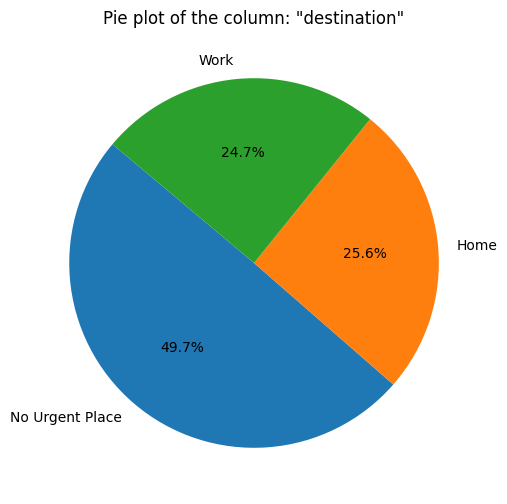

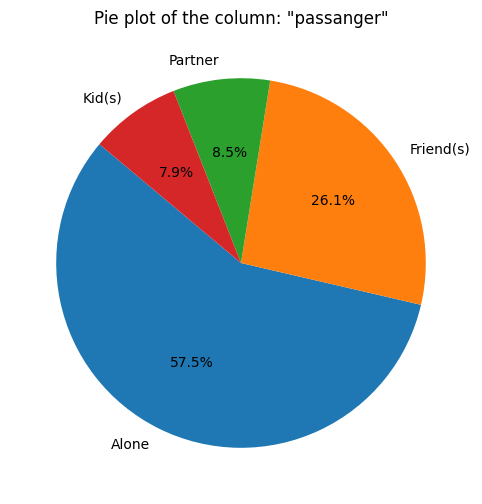

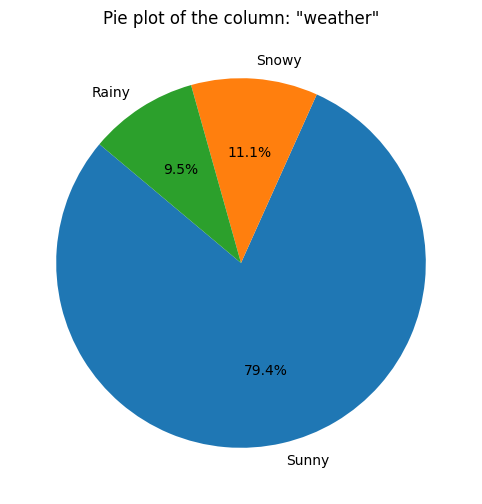

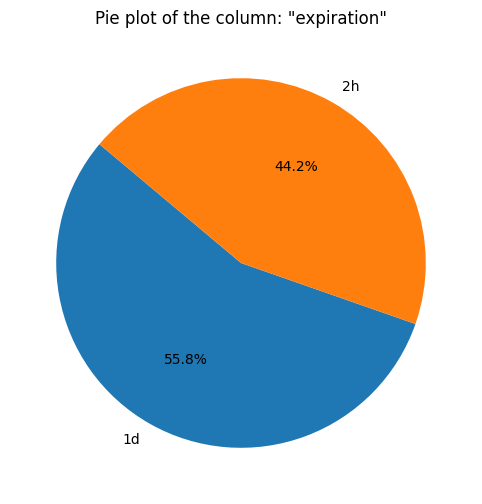

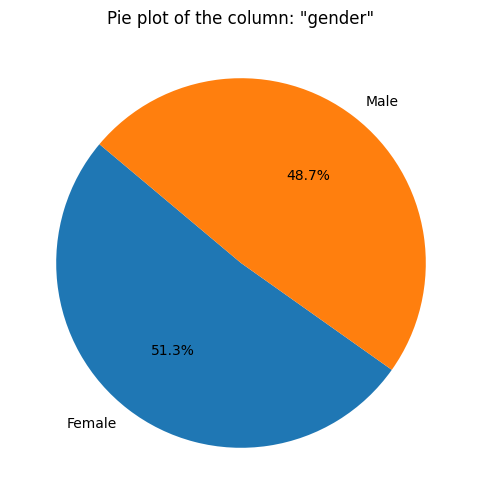

In [37]:
for col in df_OHE.columns:
      plt.figure(figsize=(8, 6))
      df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
      plt.title('Pie plot of the column: "{}"'.format(col))
      plt.ylabel('')  # Elimina la etiqueta del eje y
      plt.show()

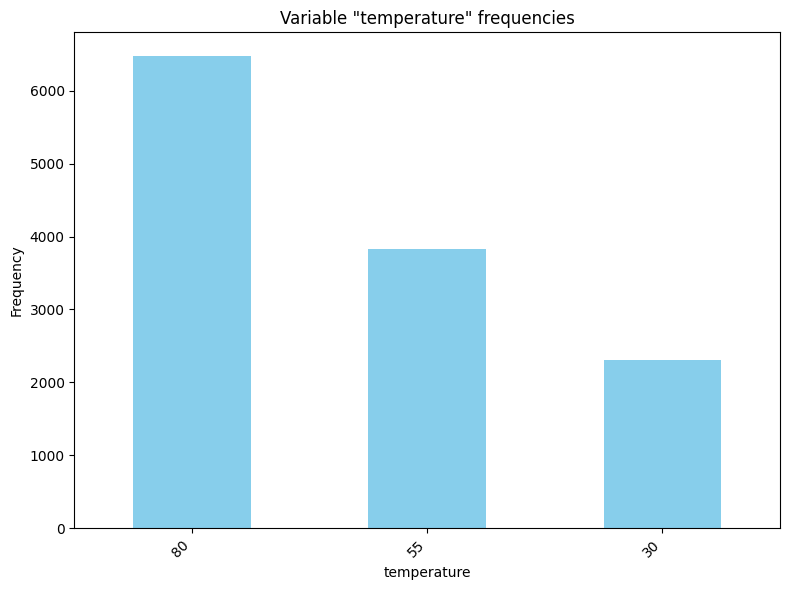

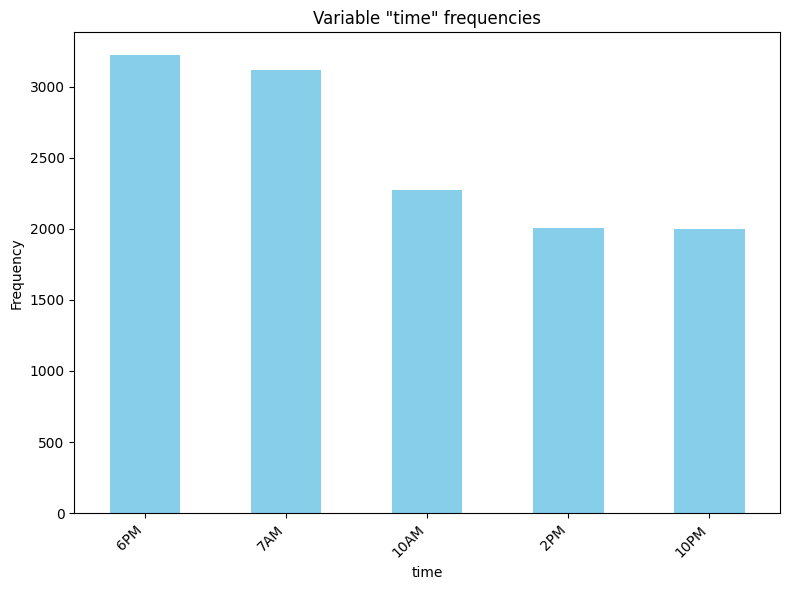

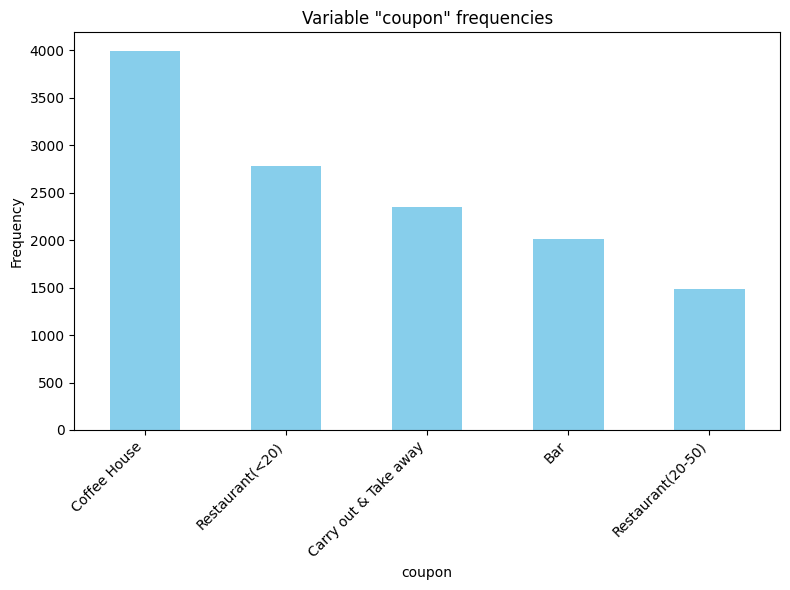

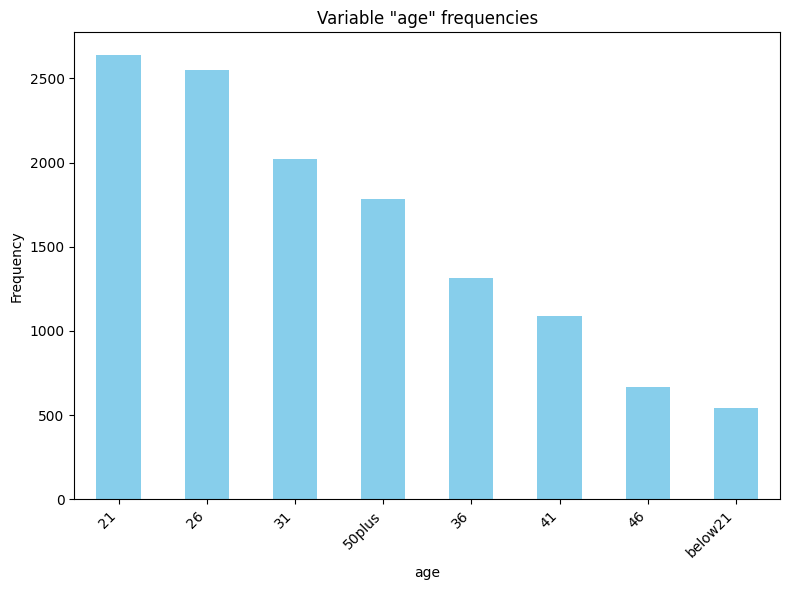

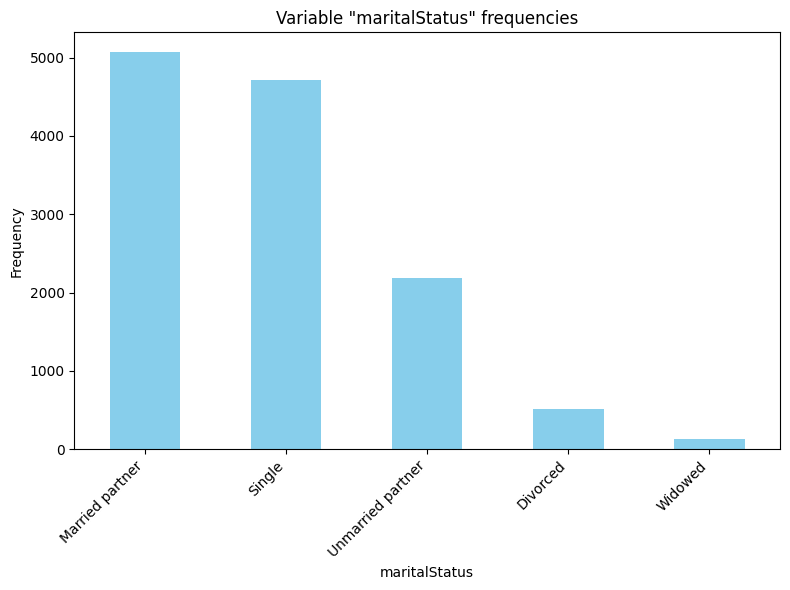

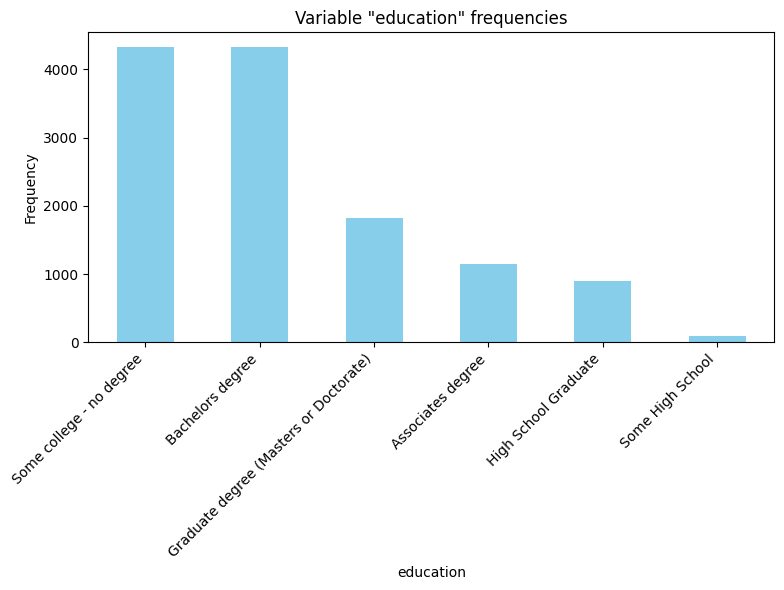

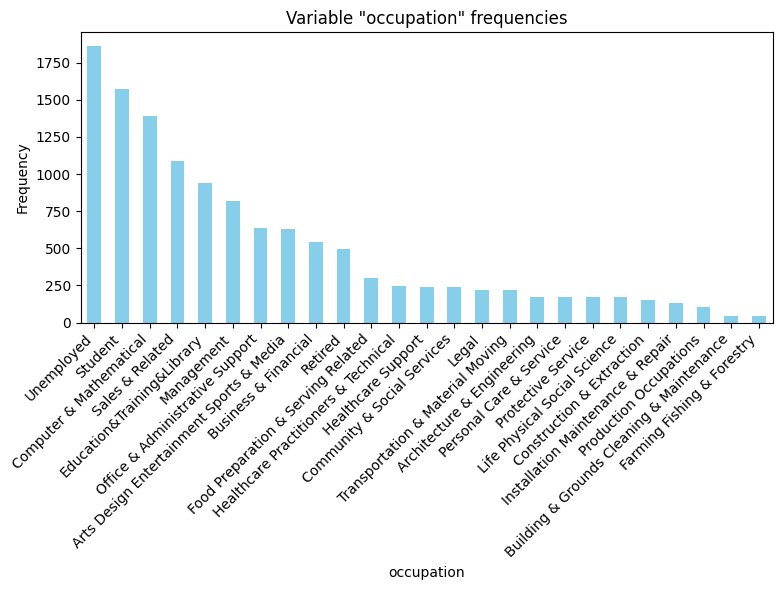

In [38]:
for col in df_LBE.columns:
      plt.figure(figsize=(8, 6))
      frec = df[col].value_counts()
      frec.plot(kind='bar', color='skyblue')
      plt.title('Variable "{}" frequencies'.format(col))
      plt.ylabel('Frequency')  # Elimina la etiqueta del eje y
      plt.xlabel(col)
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()

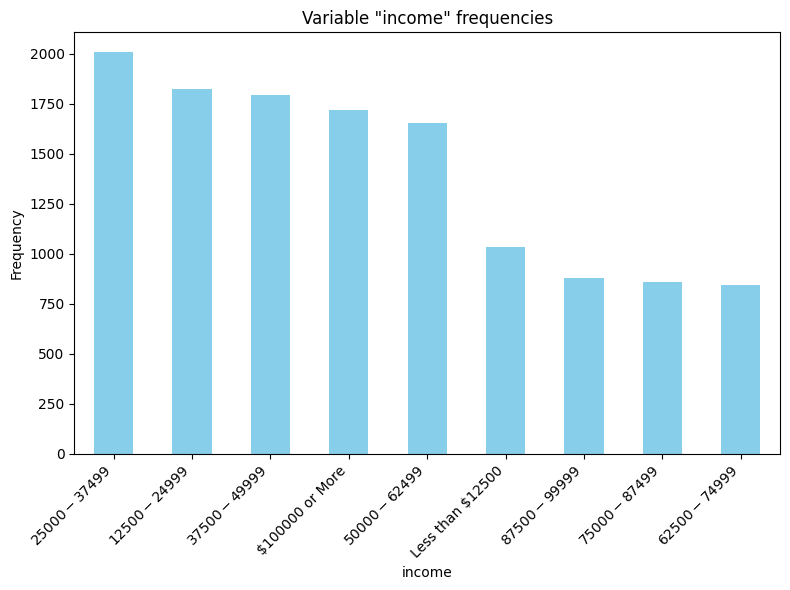

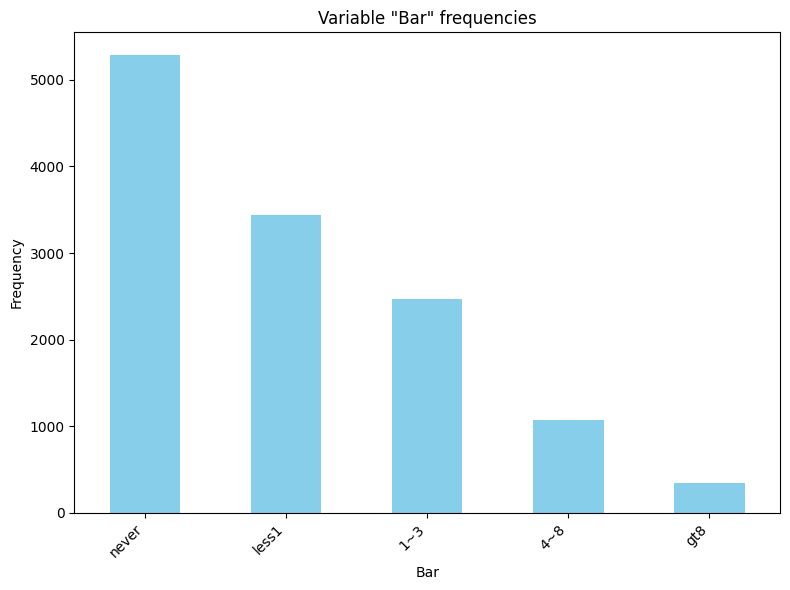

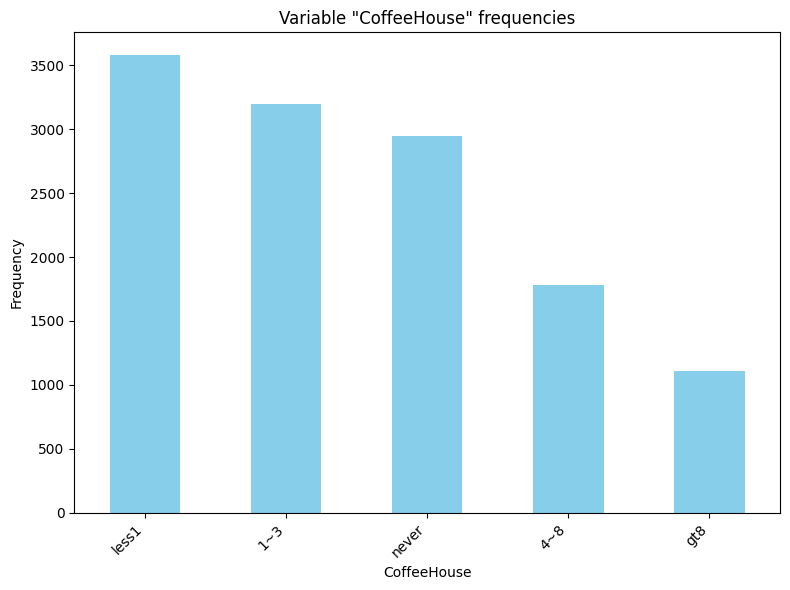

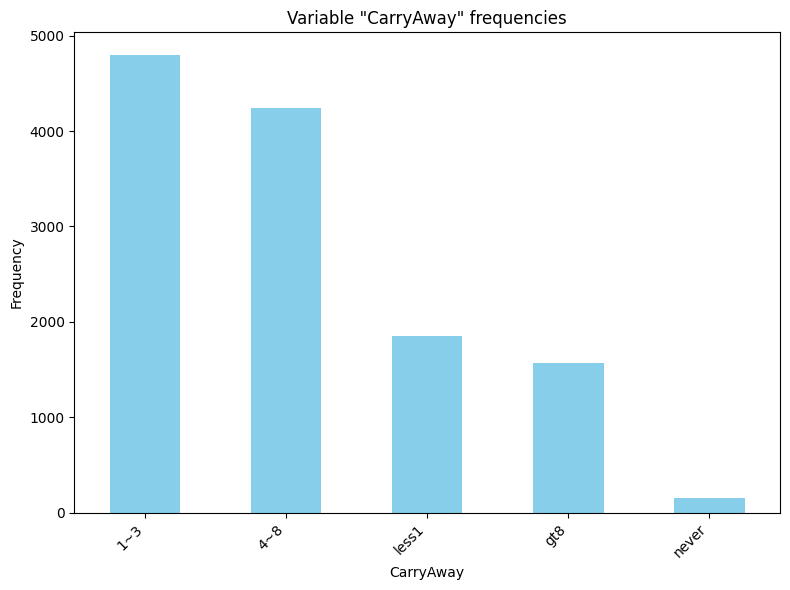

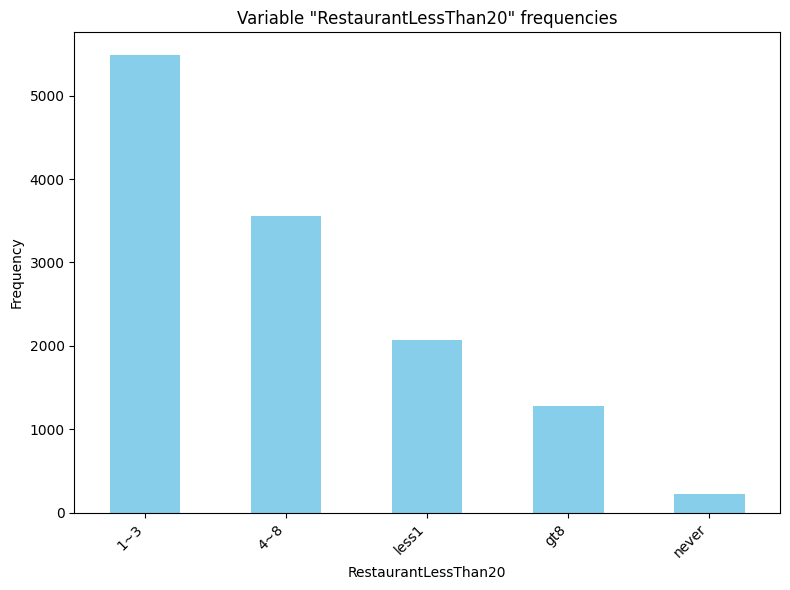

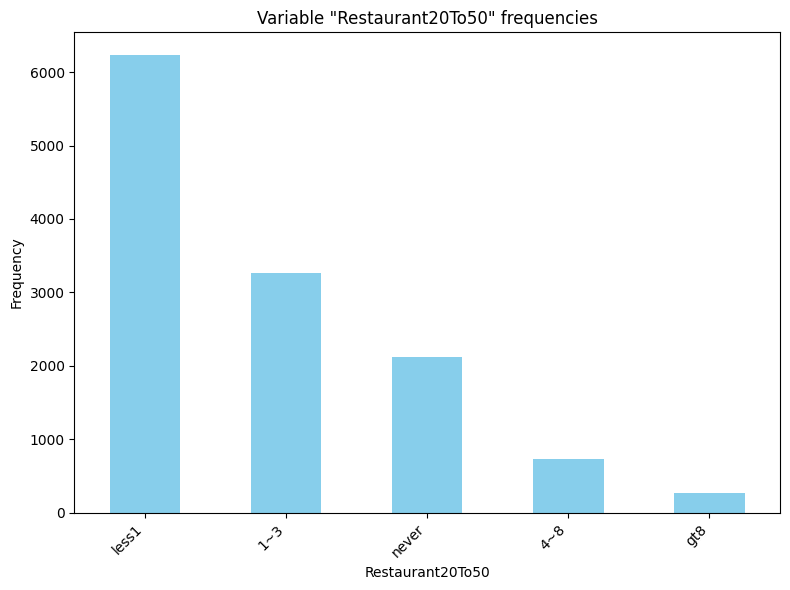

In [39]:
for col in df_ORE.columns:
      plt.figure(figsize=(8, 6))
      frec = df[col].value_counts()
      frec.plot(kind='bar', color='skyblue')
      plt.title('Variable "{}" frequencies'.format(col))
      plt.ylabel('Frequency')  # Elimina la etiqueta del eje y
      plt.xlabel(col)
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()

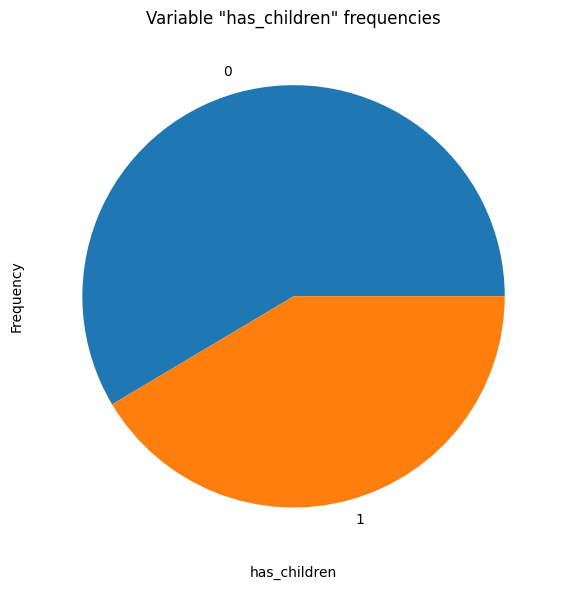

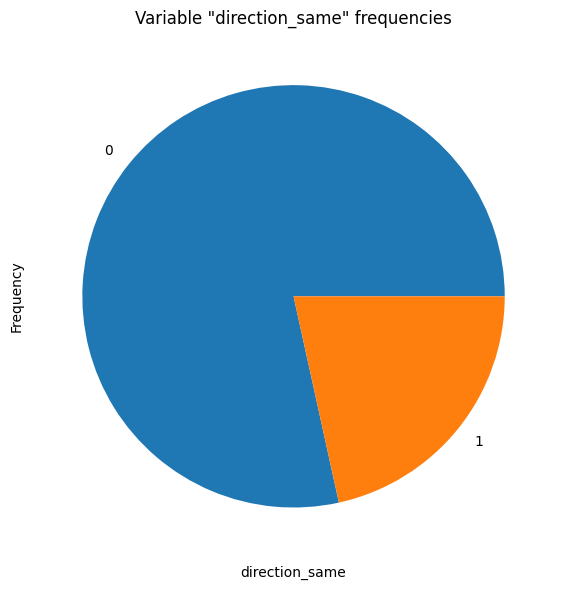

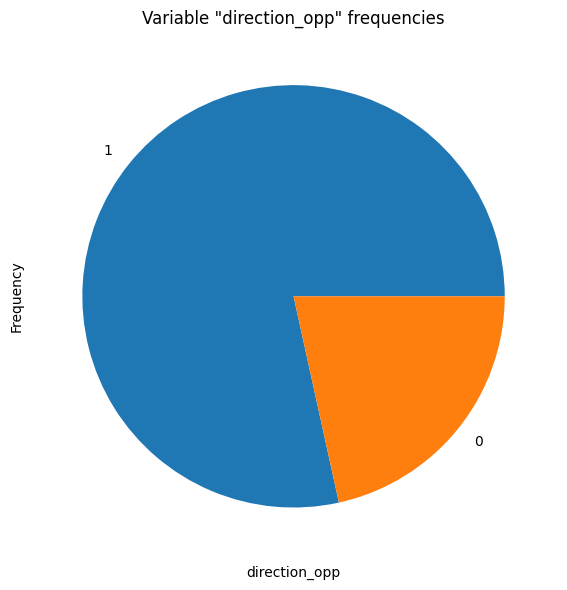

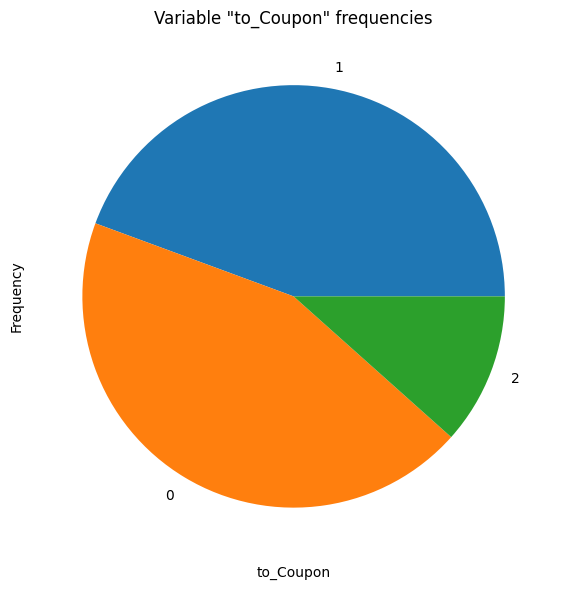

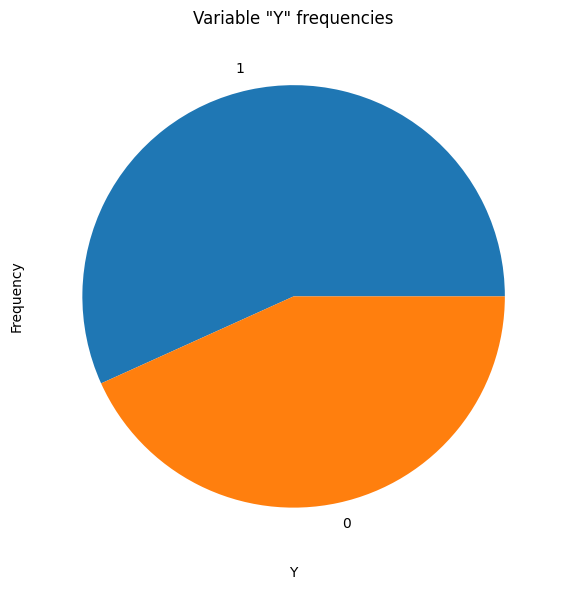

In [40]:
for col in df_rest.columns:
      plt.figure(figsize=(8, 6))
      frec = df[col].value_counts()
      frec.plot(kind='pie')
      plt.title('Variable "{}" frequencies'.format(col))
      plt.ylabel('Frequency')  # Elimina la etiqueta del eje y
      plt.xlabel(col)
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()

# Preliminary analysis 

Before coding the variables, we performed an analysis of the variables.
1. The target variable is analyzed.
2. Multicollinearity study
3. Study of the correlation with the target variable.

## Target variable

In [41]:
y  = df['Y'].value_counts()
y

Y
1    7157
0    5453
Name: count, dtype: int64

The target variable `Y` is unbalanced as could also be seen in the graphical analysis, but it is not sufficient for oversampling. We will continue to work in this way.

## Multicollinearity

The correlation between variables that by default had a numerical format is studied.

In [42]:
#Correlation of Features

numeric_categorical_features = df.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = df[numeric_categorical_features]
df_numeric_categorical.corr()

,temperature,has_children,direction_same,direction_opp,Y,to_Coupon
temperature,1.000000,-0.018599,0.097972,-0.097972,0.059393,-0.224414
has_children,-0.018599,1.000000,-0.032353,0.032353,-0.045056,0.053572
direction_same,0.097972,-0.032353,1.000000,-1.000000,0.014932,-0.313796
direction_opp,-0.097972,0.032353,-1.000000,1.000000,-0.014932,0.313796
Y,0.059393,-0.045056,0.014932,-0.014932,1.000000,-0.112678
to_Coupon,-0.224414,0.053572,-0.313796,0.313796,-0.112678,1.000000


It can be seen that the variable 'direction_same' is perfectly correlated with 'direction_opp', they have the same variance.


The variable 'direction_opp' is eliminated.

In [43]:
df.drop(['direction_opp'], axis=1, inplace=True)

# Cathegorical coding

In [44]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [45]:
df_OHE = df[['destination','passanger','weather','expiration','gender']]
df_LBE = df[['temperature','coupon','age','maritalStatus','education','occupation']]
df_ORE = df[['income', 'time', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']]
df_rest = df[['has_children', 'direction_same','to_Coupon','Y']]

In [46]:
income_categories = [
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
    '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
    '$100000 or More'
]

time_categories = [
    '7AM','10AM','2PM','6PM','10PM'
]

other_categories = ['never', 'less1', '1~3', '4~8', 'gt8']

Ordinal_enc = OrdinalEncoder(categories=[income_categories] + [time_categories] + [other_categories] * 5)
df_encoded = Ordinal_enc.fit_transform(df_ORE)
df_ORE_encoded = pd.DataFrame(df_encoded, columns=df_ORE.columns)
df_ORE_encoded.head()
# df[columns_to_encode] = df_Ordinal_encoding
# df.head()

,income,time,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,3.0,2.0,0.0,0.0,2.0,3.0,2.0
1,3.0,1.0,0.0,0.0,2.0,3.0,2.0
2,3.0,1.0,0.0,0.0,2.0,3.0,2.0
3,3.0,2.0,0.0,0.0,2.0,3.0,2.0
4,3.0,2.0,0.0,0.0,2.0,3.0,2.0


In [47]:
Label_enc = LabelEncoder()
df_LBE_encoded = pd.DataFrame()
category_mapping = {}
for col in df_LBE.columns:
  df_LBE_encoded[col] = Label_enc.fit_transform(df_LBE[col])
  category_mapping[col] = dict(zip(Label_enc.classes_, Label_enc.transform(Label_enc.classes_)))

# df_LBE_encoded = pd.DataFrame(df_encoded, columns=df_LBE.columns)
df_LBE_encoded.head()
for column, mapping in category_mapping.items():
    print(column)
    print(mapping)
    print()

temperature
{np.int64(30): np.int64(0), np.int64(55): np.int64(1), np.int64(80): np.int64(2)}

coupon
{'Bar': np.int64(0), 'Carry out & Take away': np.int64(1), 'Coffee House': np.int64(2), 'Restaurant(20-50)': np.int64(3), 'Restaurant(<20)': np.int64(4)}

age
{'21': np.int64(0), '26': np.int64(1), '31': np.int64(2), '36': np.int64(3), '41': np.int64(4), '46': np.int64(5), '50plus': np.int64(6), 'below21': np.int64(7)}

maritalStatus
{'Divorced': np.int64(0), 'Married partner': np.int64(1), 'Single': np.int64(2), 'Unmarried partner': np.int64(3), 'Widowed': np.int64(4)}

education
{'Associates degree': np.int64(0), 'Bachelors degree': np.int64(1), 'Graduate degree (Masters or Doctorate)': np.int64(2), 'High School Graduate': np.int64(3), 'Some High School': np.int64(4), 'Some college - no degree': np.int64(5)}

occupation
{'Architecture & Engineering': np.int64(0), 'Arts Design Entertainment Sports & Media': np.int64(1), 'Building & Grounds Cleaning & Maintenance': np.int64(2), 'Busine

In [48]:
encoded_dfs = []
for column in df_OHE.columns:
    encoded_df = pd.get_dummies(df_OHE[column])
    encoded_df.columns = [f"{column}_{col}" for col in encoded_df.columns]
    encoded_dfs.append(encoded_df)

# Concatenar los DataFrames codificados en uno solo
encoded_df = pd.concat(encoded_dfs, axis=1)

print(encoded_df)


       destination_Home  destination_No Urgent Place  destination_Work  \
0                 False                         True             False   
1                 False                         True             False   
2                 False                         True             False   
3                 False                         True             False   
4                 False                         True             False   
...                 ...                          ...               ...   
12679              True                        False             False   
12680             False                        False              True   
12681             False                        False              True   
12682             False                        False              True   
12683             False                        False              True   

       passanger_Alone  passanger_Friend(s)  passanger_Kid(s)  \
0                 True                False   

In [49]:
final_df = pd.concat([df_ORE_encoded, df_LBE_encoded, encoded_df], axis=1)

# Verificar la longitud del DataFrame final
print("Number of records in the final DataFrame:", len(final_df))

Number of records in the final DataFrame: 12684


In [50]:
final_df.head()

,income,time,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,temperature,coupon,age,...,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,expiration_1d,expiration_2h,gender_Female,gender_Male
0,3.0,2.0,0.0,0.0,2.0,3.0,2.0,1.0,4.0,0.0,...,False,False,False,False,False,True,True,False,True,False
1,3.0,1.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,...,True,False,False,False,False,True,False,True,True,False
2,3.0,1.0,0.0,0.0,2.0,3.0,2.0,2.0,1.0,0.0,...,True,False,False,False,False,True,False,True,True,False
3,3.0,2.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,...,True,False,False,False,False,True,False,True,True,False
4,3.0,2.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,...,True,False,False,False,False,True,True,False,True,False


# EDA II

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\3445800433.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 0], ax=axes[0, 0], order=destination_order, hue_order=passenger_order, palette=custom_palette)
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\3445800433.py:16: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 1], ax=axes[0, 1], order=destination_order, hue_order=passenger_order, palette=custom_palette)
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\3445800433.py:23: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='destination', hue='time', data=df[df['Y'] == 0], ax=axes[1, 0], order=destination_order, hue_order=time_order, palette=custom_palette)
C:\Users\bysan\AppData\Local\

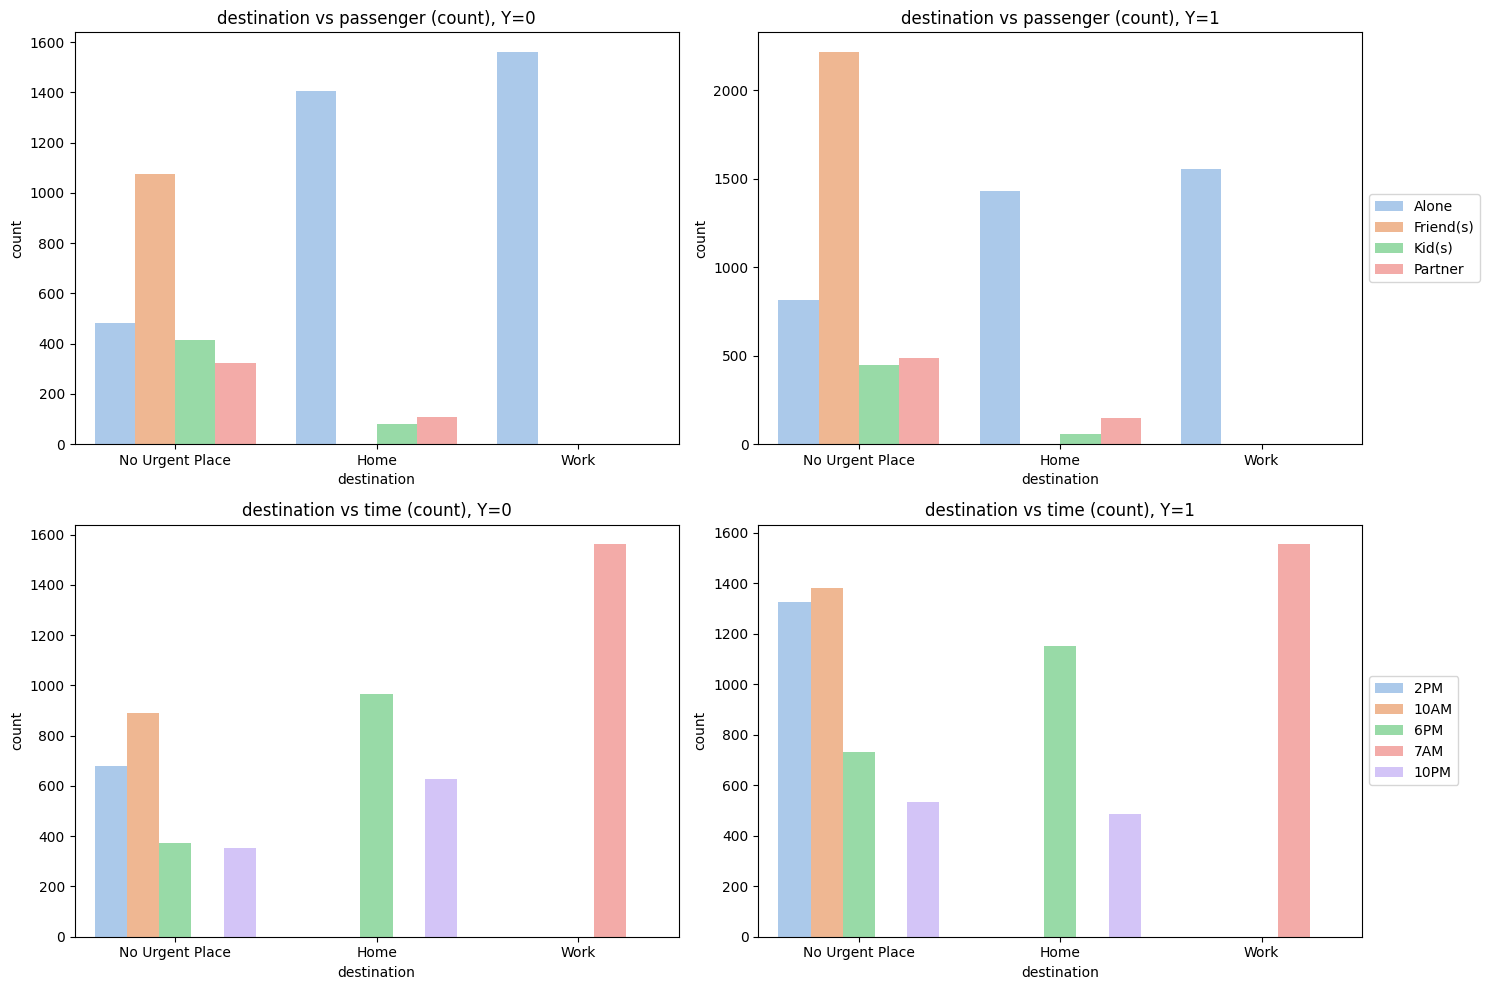

In [51]:
# Define the order of unique values for each variable
destination_order = df['destination'].unique()
passenger_order = df['passanger'].unique()
time_order = df['time'].unique()
custom_palette = sns.color_palette("pastel")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 0], ax=axes[0, 0], order=destination_order, hue_order=passenger_order, palette=custom_palette)
axes[0, 0].set_title('destination vs passenger (count), Y=0')
axes[0, 0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 1], ax=axes[0, 1], order=destination_order, hue_order=passenger_order, palette=custom_palette)
axes[0, 1].set_title('destination vs passenger (count), Y=1')

# Set legend on the right
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for 'destination' vs 'time', Y=0
sns.countplot(x='destination', hue='time', data=df[df['Y'] == 0], ax=axes[1, 0], order=destination_order, hue_order=time_order, palette=custom_palette)
axes[1, 0].set_title('destination vs time (count), Y=0')
axes[1, 0].legend().remove()


# Plot for 'destination' vs 'time', Y=1
sns.countplot(x='destination', hue='time', data=df[df['Y'] == 1], ax=axes[1, 1], order=destination_order, hue_order=time_order, palette=custom_palette)
axes[1, 1].set_title('destination vs time (count), Y=1')

# Set legend on the right
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\3613836127.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=time_order, hue_order=coupon_order, palette=custom_palette)
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\3613836127.py:14: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=time_order, hue_order=coupon_order, palette=custom_palette)


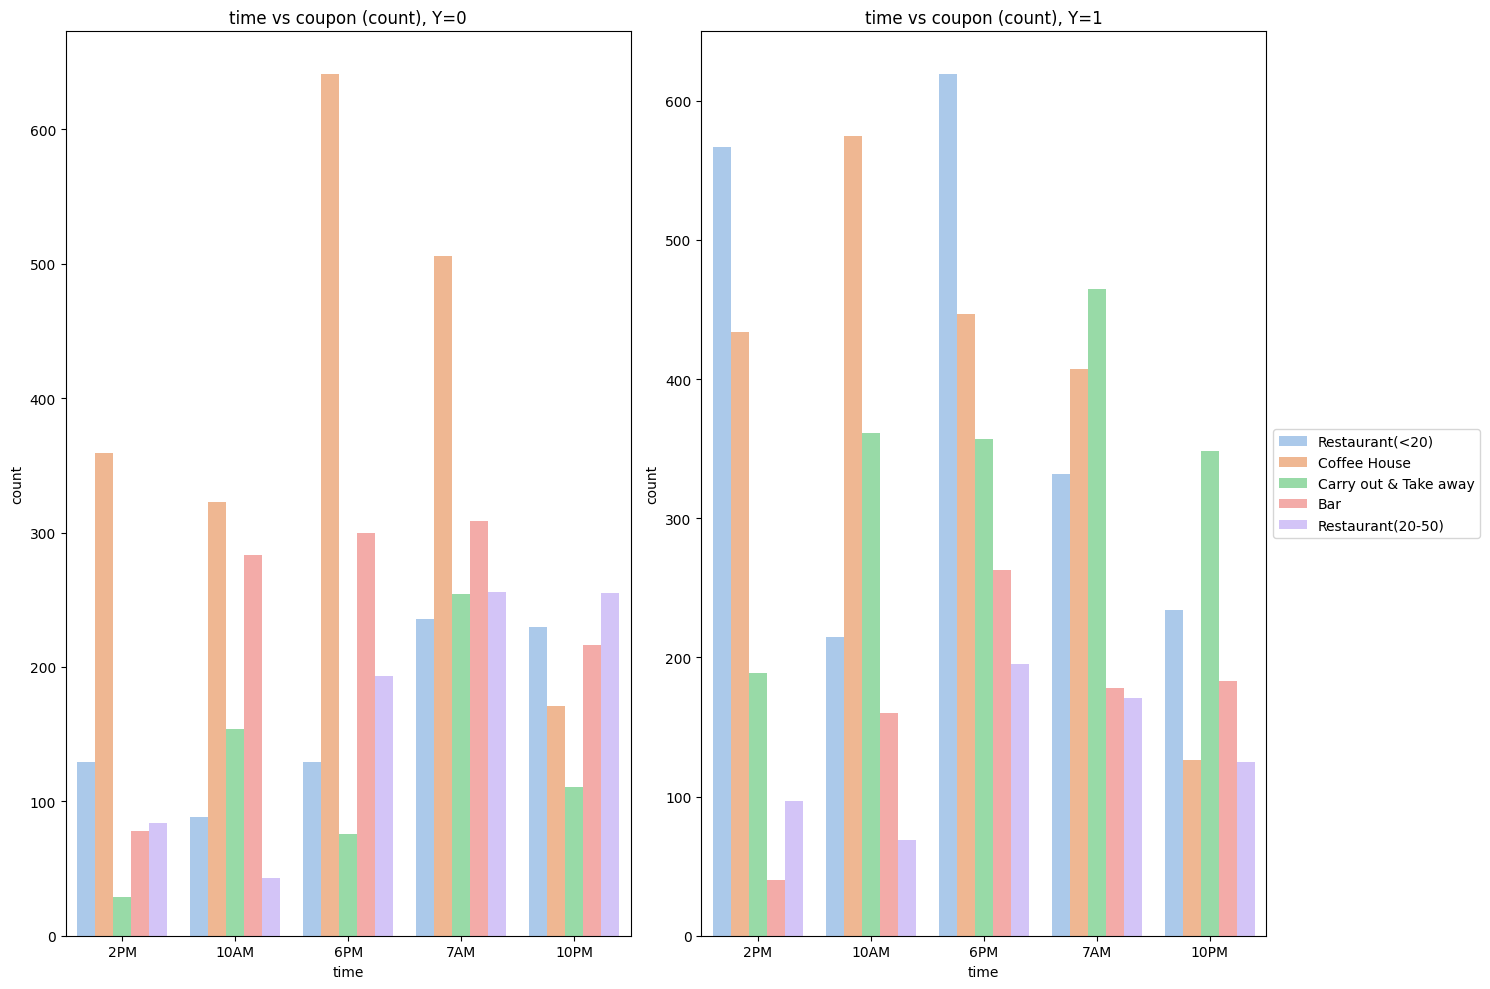

In [52]:
# Define the order of unique values for each variable
coupon_order = df['coupon'].unique()
time_order = df['time'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=time_order, hue_order=coupon_order, palette=custom_palette)
axes[0].set_title('time vs coupon (count), Y=0')
axes[0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=time_order, hue_order=coupon_order, palette=custom_palette)
axes[1].set_title('time vs coupon (count), Y=1')

# Set legend on the right
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

- At 10AM, 2 PM and 6 PM, users mostly accept Restaurant(<20), Carry out and coffee house coupons.
- A las 2PM y a las 6PM los usuarios de Restaurant(<20) aceptan más cupones que a otras horas.
- Para los CoffeeHouse (categoría mayoritaria) tienen más clientes a las 6PM.
- Para todas las categorías se reduce el consumo a las 10PM (la categoría Take Away es la más alta a esta hora). La segunda más alta es Restaurants<20 pero el número de aceptación y rechazo es el mismo.
- A las 7 AM, 10AM, 2PM and 6 PM, Coffee House es la categorías más frecuente (es el tipo de cupón más común).
- A las 7AM y 10PM los cupones a Restaurantes más caros se rechazan.
- Para bares, los usuarios rechazan más que aceptan cupones en cualquier momento del día.

In [53]:
def percent_value_counts(df, feature):
    data = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    data['Total_Count'] = list(df.groupby(feature).Y.count())
    data['Total_%'] = round(data['Total_Count']/df[feature].shape[0]*100,3)
    data['Accepted'] = list(df[df.Y==1].groupby(feature).Y.count())
    data['Rejected'] = list(df[df.Y==0].groupby(feature).Y.count())
    data['%Accepted'] = round(data['Accepted']/data['Total_Count']*100,3)
    data['%Rejected'] = round(data['Rejected']/data['Total_Count']*100,3)
    return data

In [54]:
def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Total_Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.show()

    return df_EDA

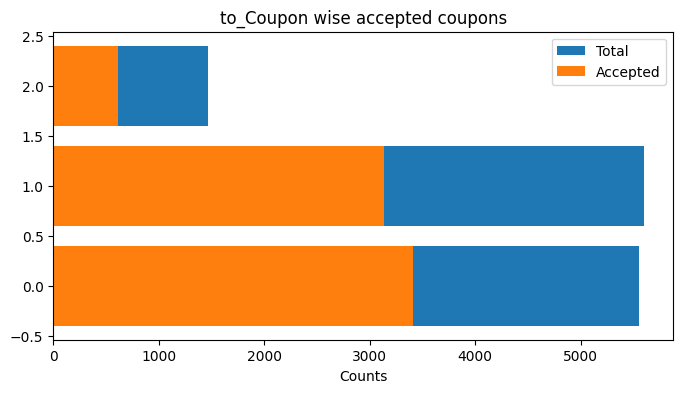

,to_Coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,5596,44.377,3136,2460,56.040,43.960
0,0,5551,44.021,3407,2144,61.376,38.624
2,2,1463,11.602,614,849,41.969,58.031


In [55]:
univariate_analysis(df,'to_Coupon')

Most coupons are offered less than 25 minutes away. Moreover, the acceptance rate exceeds 50% in these cases.

‘coupon_freq’ is a combination of five features, RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, and Restaurant20To50. These five features tell how frequently a user is going to RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, and Restaurant20To50.

Every user is asked for a single coupon, so we need only the frequency of that one coupon type, other coupon details are not needed. so we create a new feature that tells how frequently a user used the asked coupon.

In [56]:
coupon_map = {
    'Restaurant(<20)': 'RestaurantLessThan20',
    'Coffee House': 'CoffeeHouse',
    'Carry out & Take away': 'CarryAway',
    'Bar': 'Bar',
    'Restaurant(20-50)': 'Restaurant20To50'
}

# Use the map function to create the 'coupon_freq' column
df['coupon_freq'] = df['coupon'].map(coupon_map)
df['coupon_freq'] = df.apply(lambda row: row[row['coupon_freq']], axis=1)
# Print unique values
print('Unique values:', df['coupon_freq'].unique())
print('-' * 50)

# Describe the 'coupon_freq' column
print(df['coupon_freq'].describe())

Unique values: ['4~8' 'never' '1~3' 'less1' 'gt8']
--------------------------------------------------
count     12610
unique        5
top         1~3
freq       3870
Name: coupon_freq, dtype: object


C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\3521380073.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=coupon_freq_order, hue_order=coupon_order, palette=custom_palette)
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\3521380073.py:14: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=coupon_freq_order, hue_order=coupon_order, palette=custom_palette)


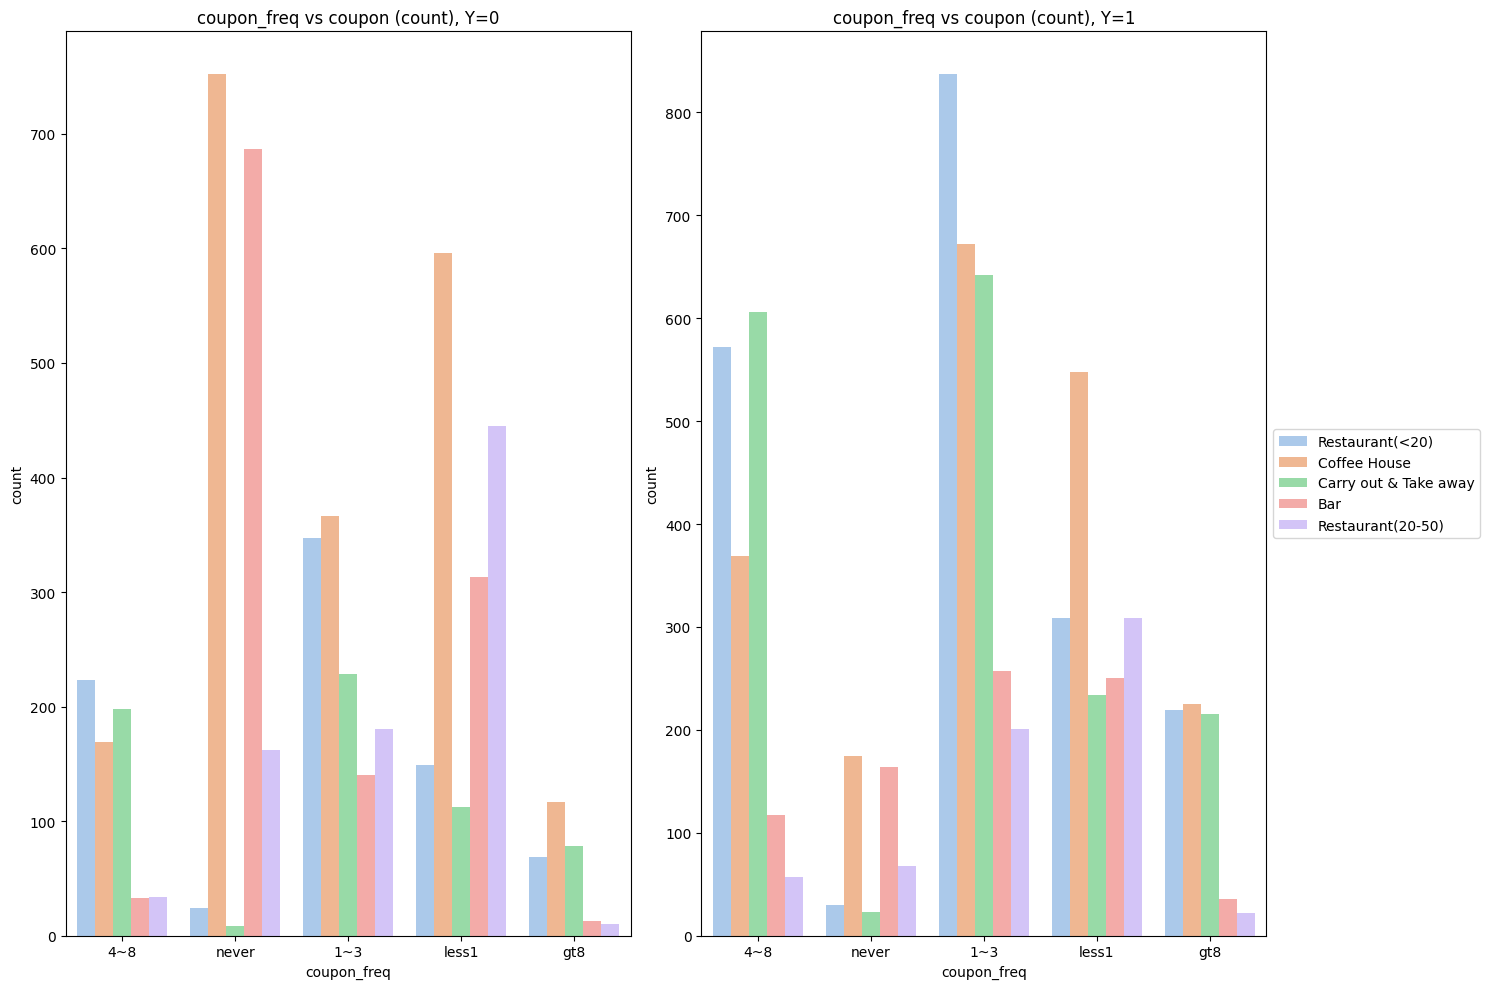

In [57]:
# Define the order of unique values for each variable
coupon_order = df['coupon'].unique()
coupon_freq_order = df['coupon_freq'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=coupon_freq_order, hue_order=coupon_order, palette=custom_palette)
axes[0].set_title('coupon_freq vs coupon (count), Y=0')
axes[0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=coupon_freq_order, hue_order=coupon_order, palette=custom_palette)
axes[1].set_title('coupon_freq vs coupon (count), Y=1')

# Set legend on the right
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

With the `coupon_freq` variable, variables indicating the user's preference can be removed.

In [58]:
df.drop(['RestaurantLessThan20','CoffeeHouse', 'CarryAway', 'Bar', 'Restaurant20To50'], axis=1, inplace=True)

## `occupation` grouping

***occupation_class***

occupation feature has 25 no of distinct values, which creates very sparsity in the data matrix after encoding so we can try to convert it into a new feature called occupation_class.

We will divide them into five categories in the order of acceptance ratio of coupons:

4: High
3: Medium_high
2: medium
1: Medium_low
0: Low

In [59]:
occupation_acceptance_rate = df.groupby("occupation")["Y"].mean()

quintiles = pd.qcut(occupation_acceptance_rate, 5, labels=False)

occupation_class = pd.Series(quintiles, index=occupation_acceptance_rate.index)

df["occupation_class"] = df["occupation"].map(occupation_class)

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,direction_same,Y,to_Coupon,coupon_freq,occupation_class
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,0,4~8,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,0,never,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,1,1~3,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,1,never,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,1,never,1


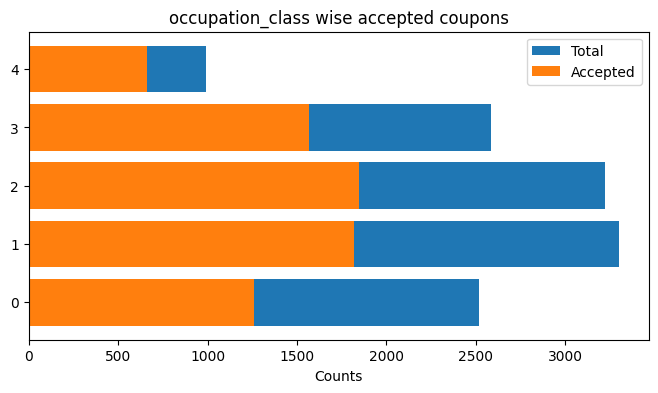

,occupation_class,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,3300,26.170,1821,1479,55.182,44.818
2,2,3221,25.543,1849,1372,57.405,42.595
3,3,2583,20.484,1566,1017,60.627,39.373
0,0,2517,19.960,1258,1259,49.980,50.020
4,4,989,7.843,663,326,67.037,32.963


In [60]:
univariate_analysis(df,'occupation_class')

**Relationship of the variables `income` with `occupation_class`**.

In [61]:
contingency_table1 = pd.crosstab(df['income'], df['occupation_class'])
contingency_table1

occupation_class,0,1,2,3,4
income,,,,,
$100000 or More,350,303,693,196,175
$12500 - $24999,326,499,400,483,117
$25000 - $37499,416,519,313,500,258
$37500 - $49999,368,548,376,350,153
$50000 - $62499,516,329,462,282,66
$62500 - $74999,154,175,318,174,22
$75000 - $87499,146,196,318,108,88
$87500 - $99999,197,225,255,136,66
Less than $12500,44,506,86,354,44


**Relationship of the variables `income` with `occupation`**.

In [62]:
contingency_table = pd.crosstab(df['income'], df['occupation'])
contingency_table

occupation,Architecture & Engineering,Arts Design Entertainment Sports & Media,Building & Grounds Cleaning & Maintenance,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Farming Fishing & Forestry,Food Preparation & Serving Related,...,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
income,,,,,,,,,,,,,,,,,,,,,
$100000 or More,44,110,0,218,44,336,22,109,0,14,...,109,0,44,0,65,22,85,196,0,174
$12500 - $24999,0,151,0,43,22,99,44,87,0,154,...,104,132,44,0,0,66,218,307,44,170
$25000 - $37499,0,88,22,22,43,116,22,241,21,44,...,131,154,22,43,87,0,218,259,22,236
$37500 - $49999,21,87,22,50,43,174,22,108,22,0,...,87,154,22,43,22,108,174,109,22,308
$50000 - $62499,22,62,0,22,65,243,22,241,0,22,...,109,66,21,0,0,148,132,152,64,176
$62500 - $74999,22,22,0,78,22,174,0,66,0,0,...,66,44,0,0,0,22,65,108,22,110
$75000 - $87499,44,85,0,88,0,154,0,22,0,0,...,76,66,0,0,0,17,130,20,22,66
$87500 - $99999,22,22,0,22,0,72,0,65,0,22,...,139,22,22,0,0,66,0,92,22,203
Less than $12500,0,0,0,0,0,22,22,0,0,42,...,0,0,0,22,0,44,66,332,0,418


## occupation_sector-income

In [63]:
# Definir las listas de ocupaciones para cada nivel
primary_occupations = ['Farming Fishing & Forestry', 'Construction & Extraction']
secondary_occupations = ['Manufacturing', 'Transportation & Material Moving', 'Installation Maintenance & Repair','Production Occupations']
tertiary_occupations = ['Management', 'Business & Financial', 'Computer & Mathematical', 'Architecture & Engineering','Education&Training&Library', 'Healthcare Support', 'Healthcare Practitioners & Technical', 'Sales & Related', 'Arts Design Entertainment Sports & Media', 'Life Physical Social Science', 'Personal Care & Service', 'Community & Social Services', 'Office & Administrative Support', 'Legal', 'Protective Service', 'Food Preparation & Serving Related', 'Building & Grounds Cleaning & Maintenance']
quaternary_occupation = ['Unemployed', 'Student', 'Retired']


# Definir una función para asignar niveles basados en la ocupación
def assign_level(occupation):
    if occupation in primary_occupations:
        return 'primary'
    elif occupation in secondary_occupations:
        return 'secondary'
    elif occupation in tertiary_occupations:
        return 'tertiary'
    elif occupation in quaternary_occupation:
        return 'quaternary'
    else:
        return 'other'


# Aplicar la función a la columna 'occupation' y crear una nueva columna 'level'
df['occupation_sector'] = df['occupation'].apply(assign_level)

contingency_table2 = pd.crosstab(df['income'], df['occupation_sector'])
contingency_table2

occupation_sector,primary,quaternary,secondary,tertiary
income,,,,
$100000 or More,22,392,0,1303
$12500 - $24999,44,543,111,1127
$25000 - $37499,43,495,87,1381
$37500 - $49999,44,525,87,1139
$50000 - $62499,22,476,64,1093
$62500 - $74999,0,240,22,581
$75000 - $87499,0,103,22,731
$87500 - $99999,0,361,22,496
Less than $12500,22,794,44,174


Finally, we chose to use the occupation_sector variable instead of the others for the model.

In [64]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'direction_same', 'Y', 'to_Coupon',
       'coupon_freq', 'occupation_class', 'occupation_sector'],
      dtype='object')

In [65]:
from scipy.stats import chi2_contingency
import numpy as np

# Calcular la tabla de contingencia
contingency_table = pd.crosstab(df['occupation_sector'], df['income'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Calcular el valor de Cramer's V
n = contingency_table.sum().sum()  # Total de observaciones
min_dim = min(contingency_table.shape) - 1  # Dimensión más pequeña de la tabla de contingencia
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V: {cramers_v}")

# Imprimir el resultado de la prueba de asociación
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is insufficient evidence to reject the null hypothesis of independence between variables.")


Cramer's V: 0.20257277805173432
There is a significant association between the variables.


Although the association between the variables is weak, it is large enough to be detected as significant with the available sample. It is necessary to evaluate whether to eliminate one of them.

In [66]:
df.drop(['occupation', 'occupation_class'], axis=1, inplace=True)

In [67]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,direction_same,Y,to_Coupon,coupon_freq,occupation_sector
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,$37500 - $49999,0,1,0,4~8,quaternary
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,$37500 - $49999,0,0,0,never,quaternary
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,$37500 - $49999,0,1,1,1~3,quaternary
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,$37500 - $49999,0,0,1,never,quaternary
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,$37500 - $49999,0,0,1,never,quaternary


## education-income

In [68]:
# Calcular la tabla de contingencia
contingency_table = pd.crosstab(df['education'], df['income'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Calcular el valor de Cramer's V
n = contingency_table.sum().sum()  # Total de observaciones
min_dim = min(contingency_table.shape) - 1  # Dimensión más pequeña de la tabla de contingencia
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V: {cramers_v}")

# Imprimir el resultado de la prueba de asociación
if p_value < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is insufficient evidence to reject the null hypothesis of independence between variables.")


Cramer's V: 0.17313342577447216
There is a significant association between the variables.


As the test results are confusing (weak correlation but significant association according to the test), it was decided not to eliminate variables following this criterion.

## Weather_temperature

In [69]:
df['weather_temperature'] = df['weather'] + '_' + df['temperature'].astype(str)
df['weather_temperature'].value_counts()


weather_temperature
Sunny_80    6475
Sunny_55    2628
Snowy_30    1397
Rainy_55    1202
Sunny_30     908
Name: count, dtype: int64

In [70]:
df = df.drop(['weather', 'temperature'], axis=1)

## Análisis respecto a la variable objetivo

In [71]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Supongamos que tu DataFrame se llama 'df' y la variable objetivo se llama 'Y'
# y que todas las demás columnas son variables categóricas

# Lista para almacenar los resultados
results = []

# Iterar sobre cada columna categórica excepto la variable objetivo 'Y'
for column in df.columns:
    if column != 'Y':
        # Calcular la tabla de contingencia entre la variable categórica y la variable objetivo
        contingency_table = pd.crosstab(df[column], df['Y'])

        # Realizar el test de chi-cuadrado
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        # Calcular el coeficiente de correlación de Cramer
        n = contingency_table.sum().sum()  # Total de observaciones
        min_dim = min(contingency_table.shape) - 1  # Dimensión más pequeña de la tabla de contingencia
        cramers_v = np.sqrt(chi2 / (n * min_dim))

        # Almacenar los resultados en la lista
        results.append({'Variable': column, 'p-value': p_value, 'Cramer\'s V': cramers_v})

# Crear un DataFrame a partir de la lista de resultados
results_df = pd.DataFrame(results)

# Mostrar la tabla de resultados
# print(results_df)
results_df

,Variable,p-value,Cramer's V
0,destination,1.362619e-48,0.132214
1,passanger,3.086243e-48,0.133210
2,time,9.898537e-38,0.119285
3,coupon,1.294073e-185,0.261694
4,expiration,2.967456e-47,0.128576
5,gender,9.889795e-07,0.043580
6,age,3.259976e-11,0.070865
7,maritalStatus,1.161226e-09,0.061419
8,has_children,4.623651e-07,0.044894
9,education,3.588986e-08,0.058438


According to this test, the variable `coupon` has an extremely small p-value and the highest Cramer's correlation coefficient, indicating a strong association with the target variable. It is followed by the variables `passanger` and `to_Coupon`.

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


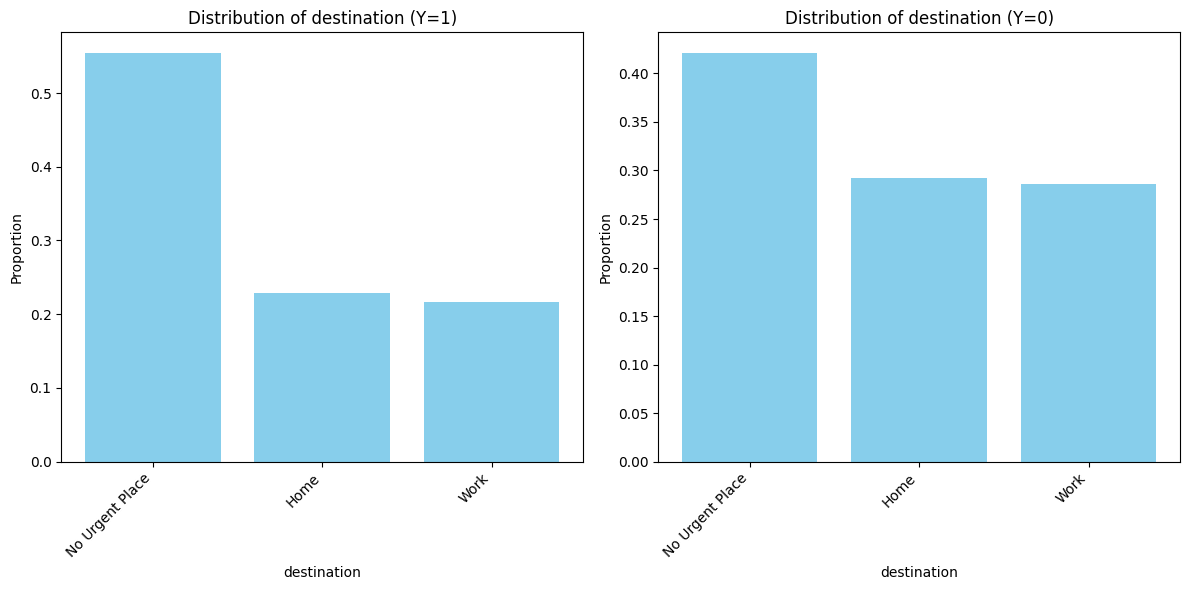

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


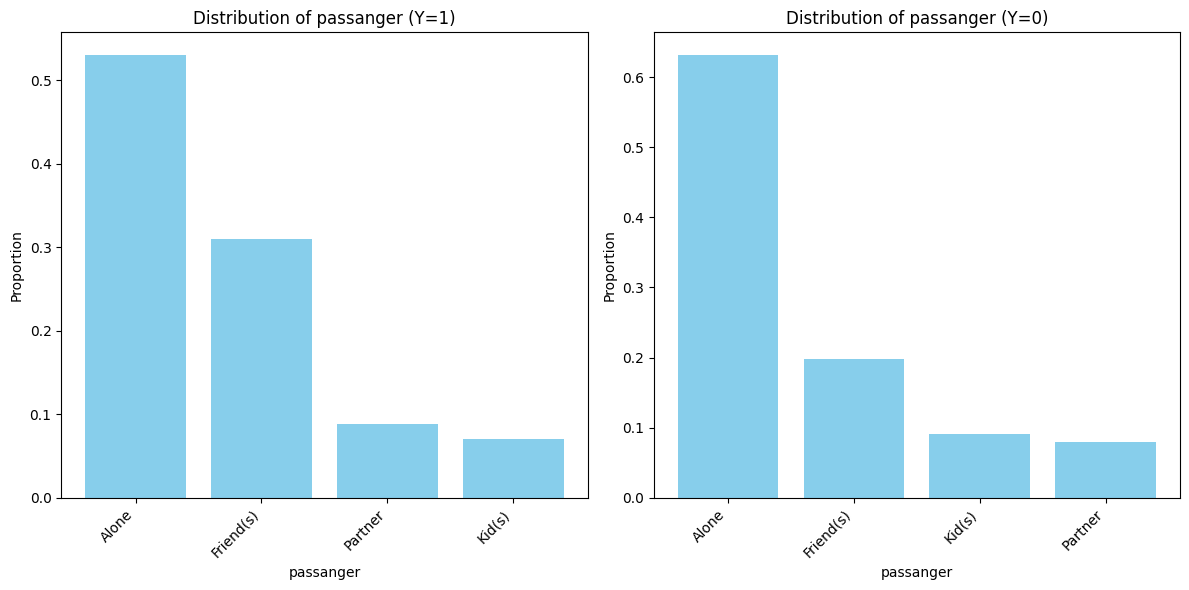

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


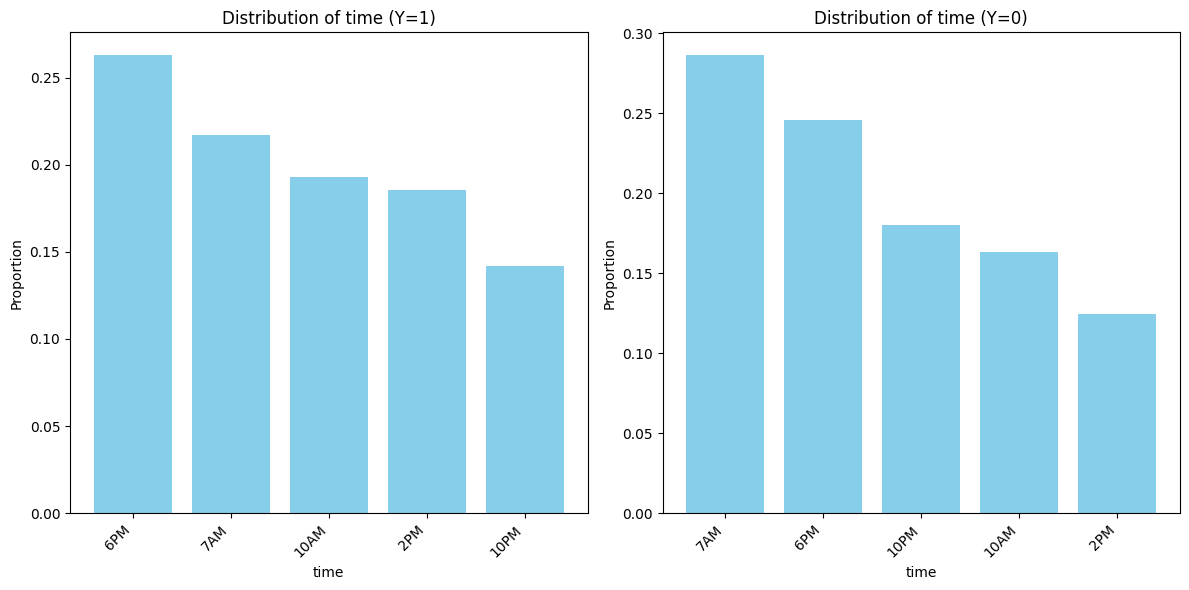

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


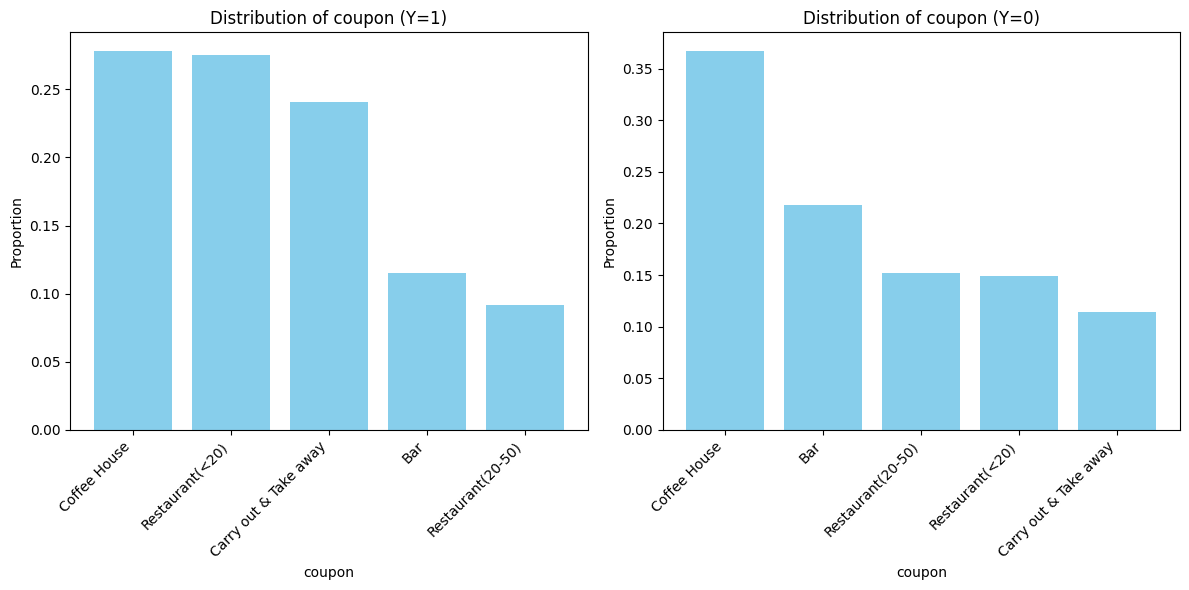

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


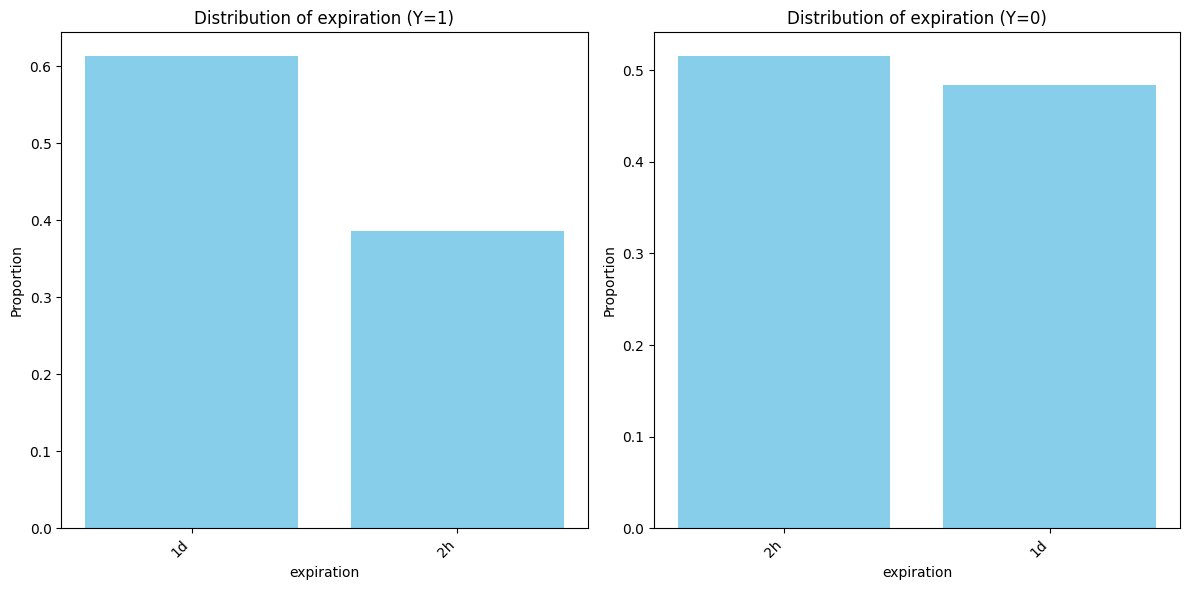

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


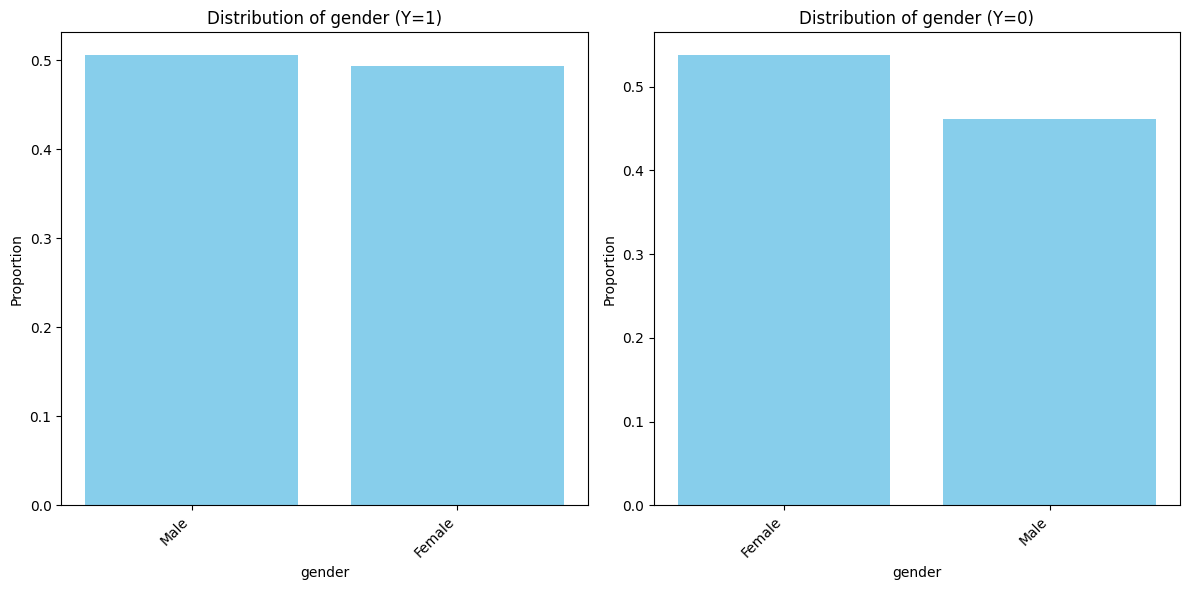

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


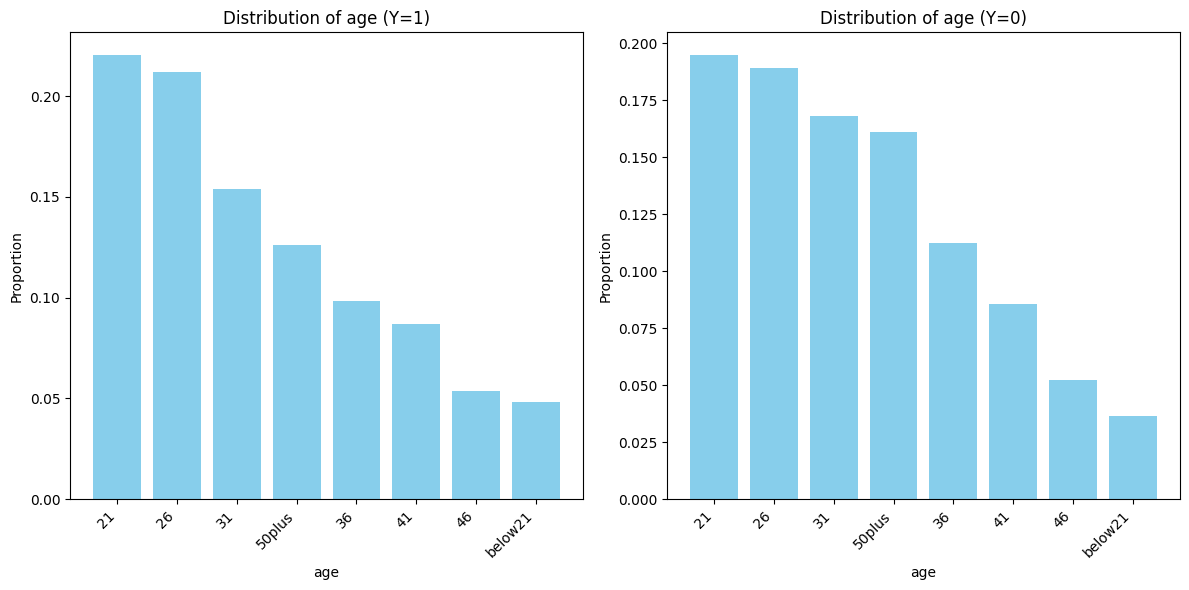

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


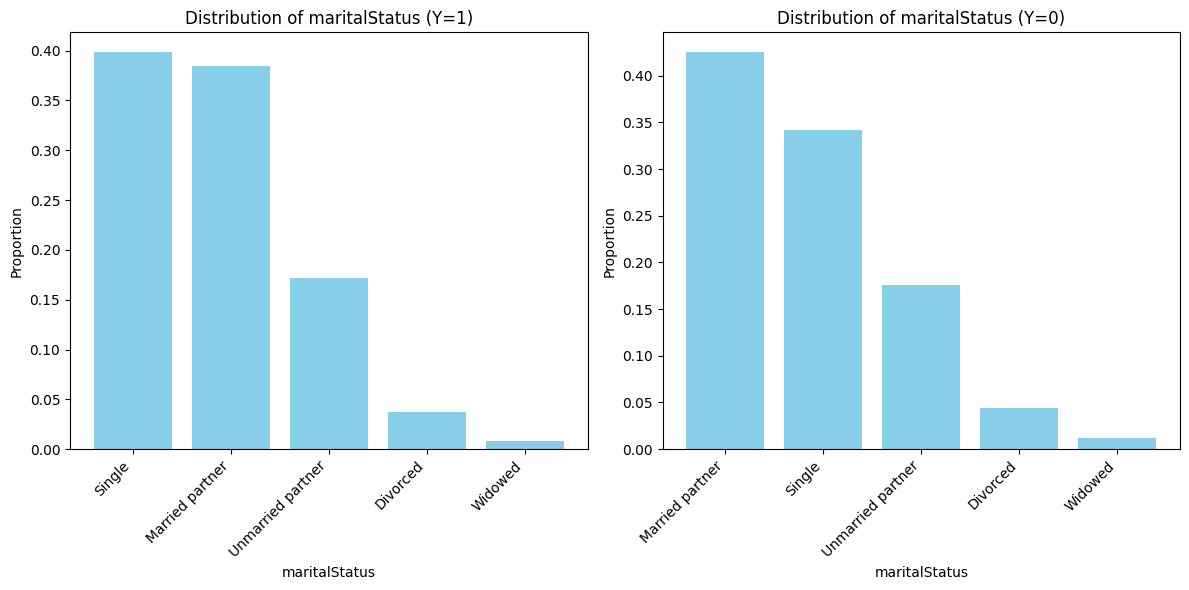

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


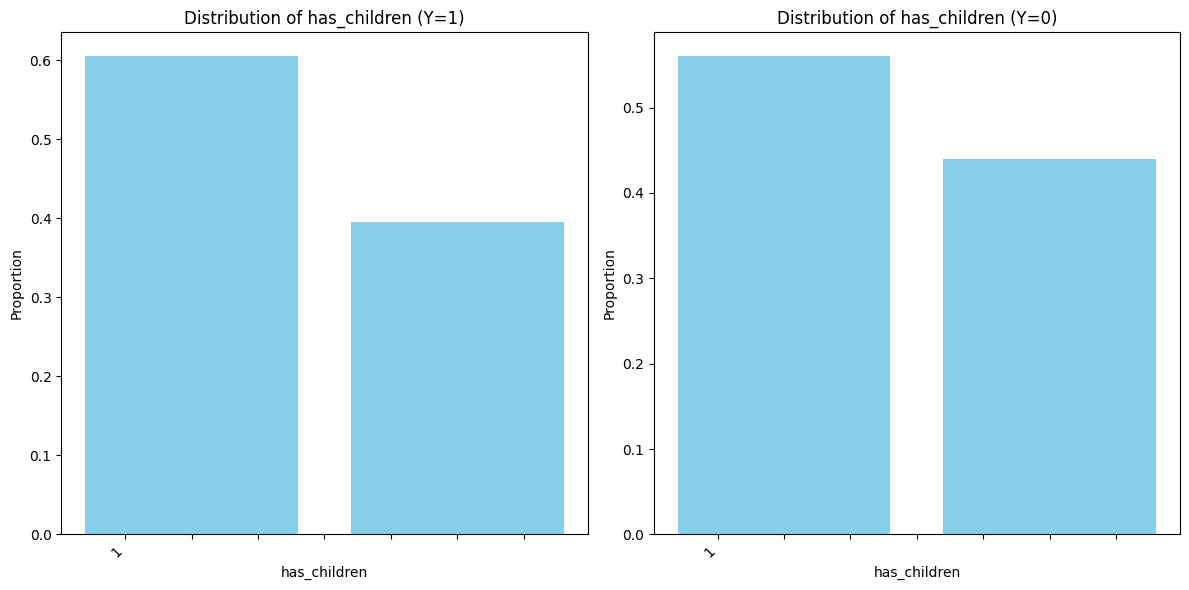

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


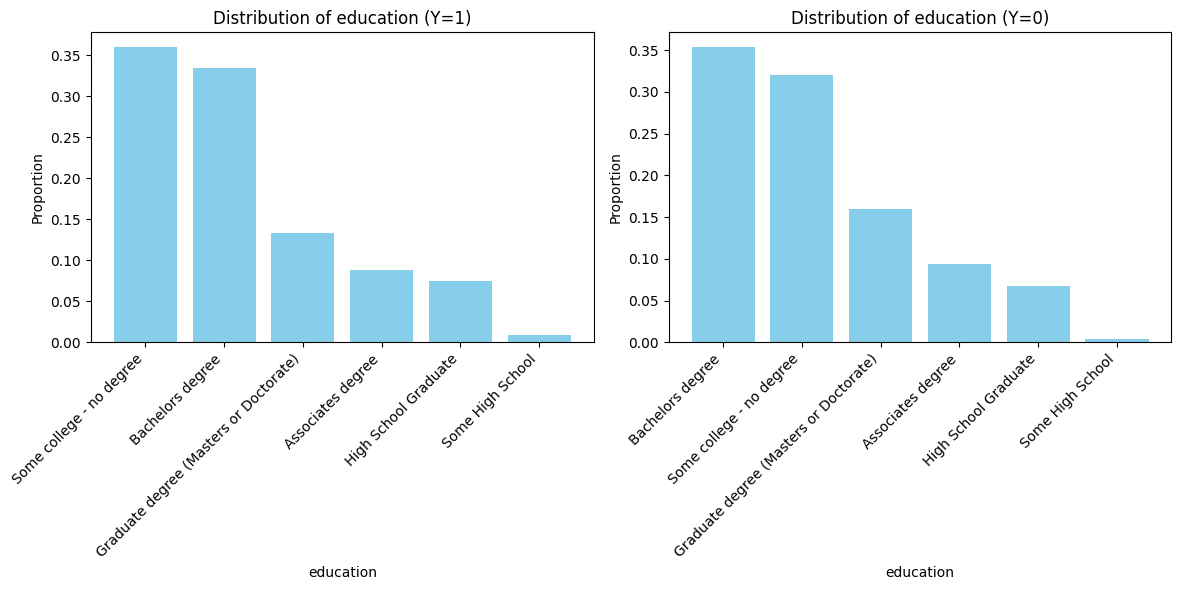

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


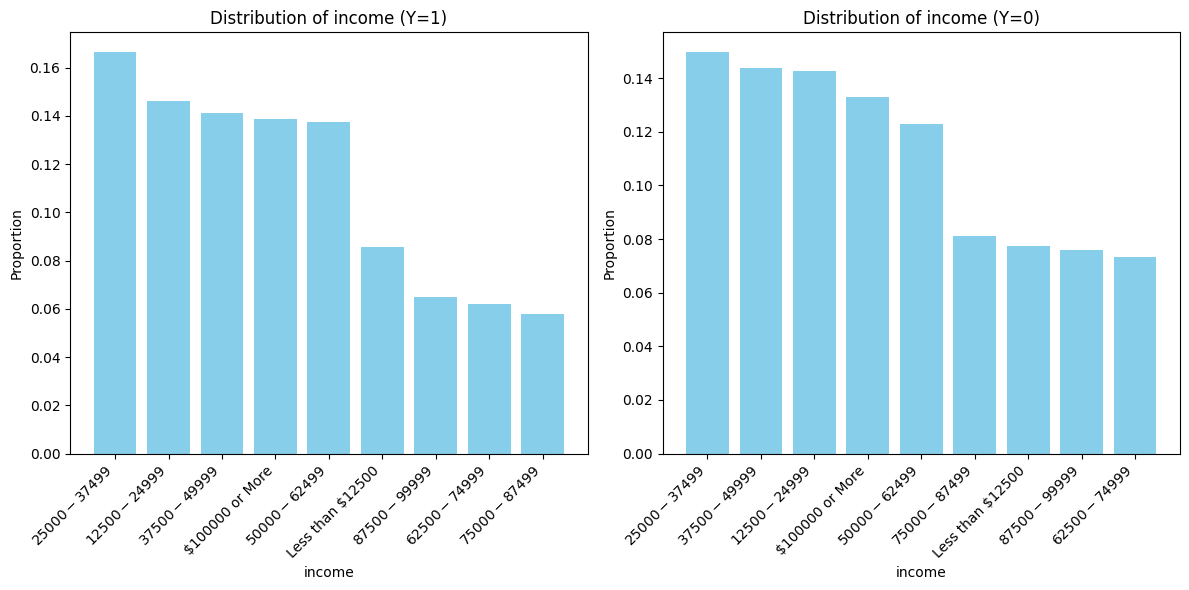

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


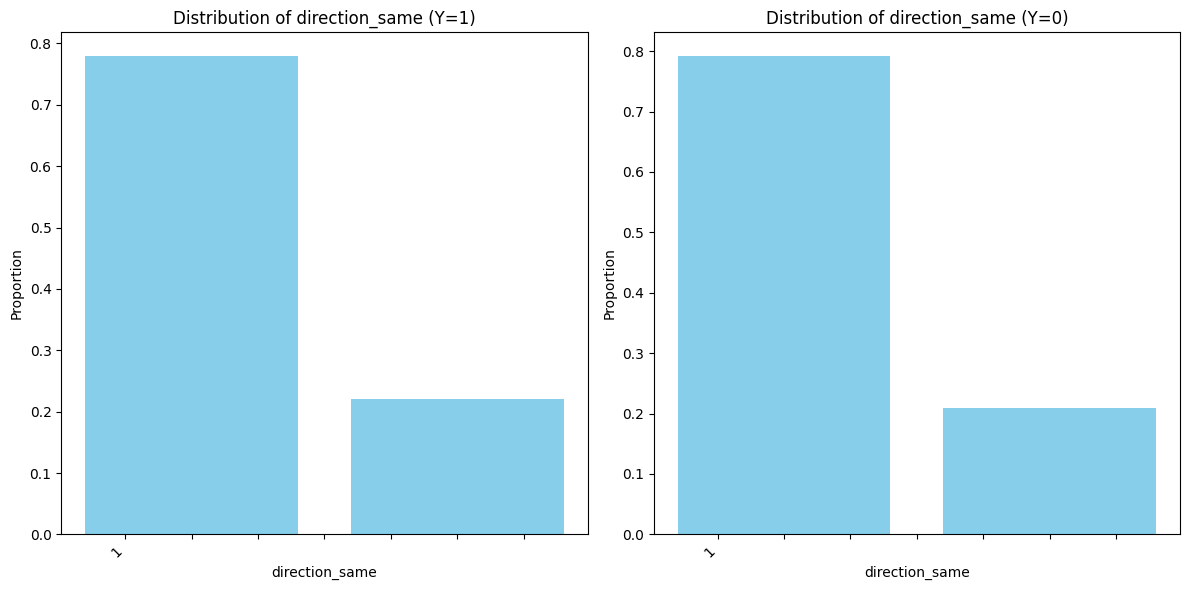

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


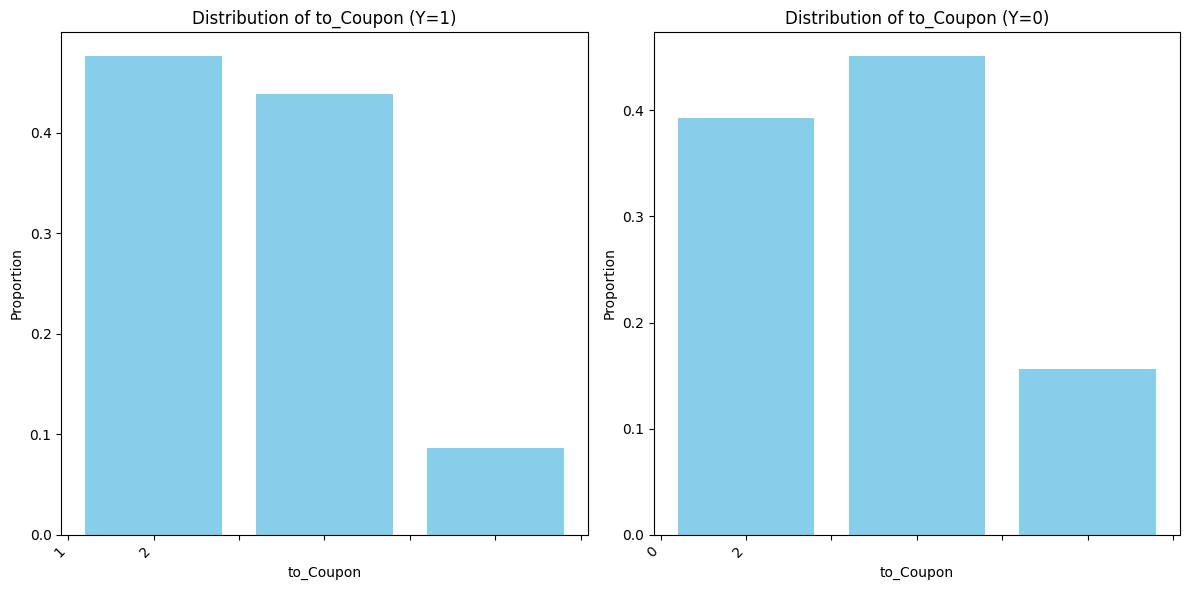

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


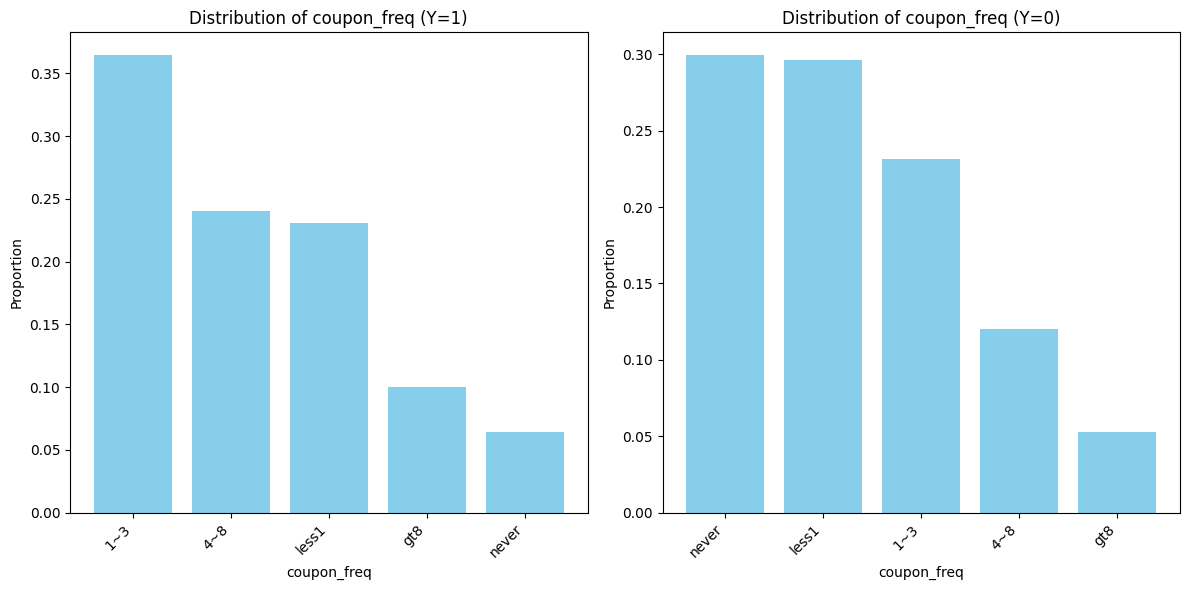

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


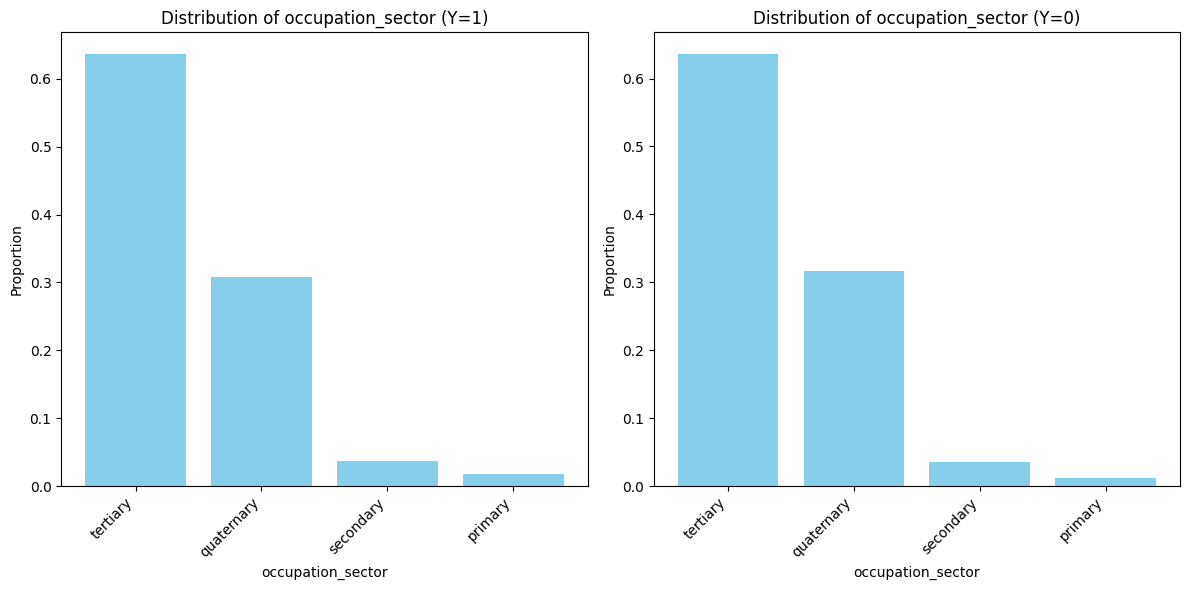

C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')
C:\Users\bysan\AppData\Local\Temp\ipykernel_18268\1346642495.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')


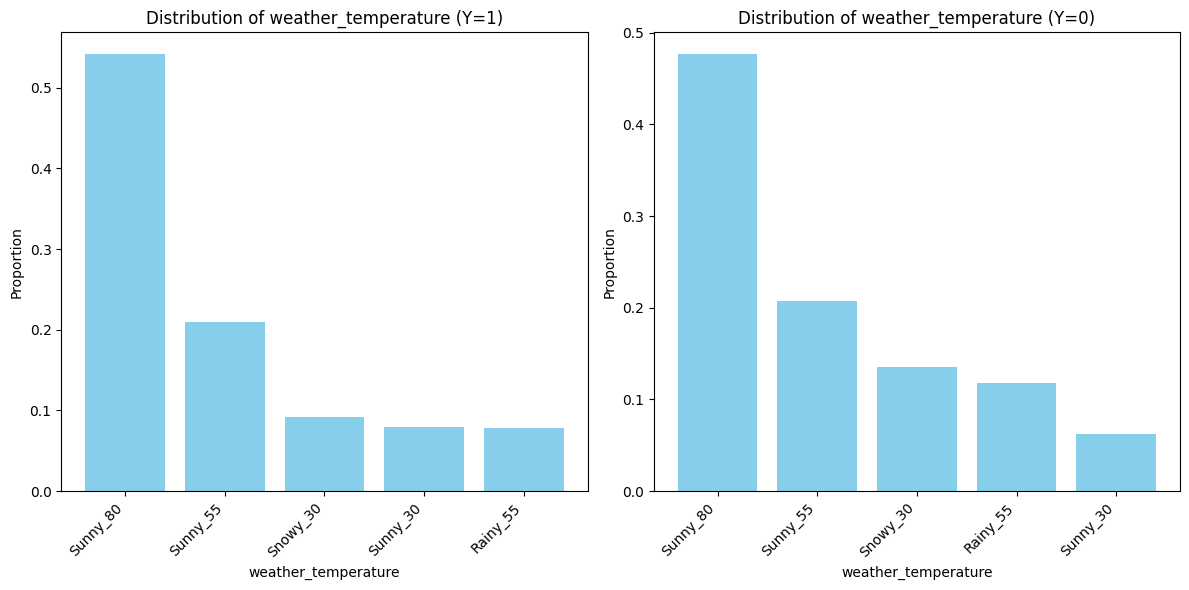

In [72]:
import matplotlib.pyplot as plt

# Iterar sobre cada columna categórica en el DataFrame
for column in df.columns:
    if column != 'Y':
        # Crear una figura y ejes para los gráficos
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Crear un gráfico de barras para cada valor de Y
        for i, Y_value in enumerate(df['Y'].unique()):
            # Filtrar el DataFrame por el valor de Y
            subset = df[df['Y'] == Y_value]

            # Contar la frecuencia de cada categoría en la columna actual
            category_counts = subset[column].value_counts(normalize=True)

            # Crear el gráfico de barras
            axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
            axes[i].set_title(f'Distribution of {column} (Y={Y_value})')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Proportion')
            axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')

        # Ajustar el diseño de los subplots
        plt.tight_layout()

        # Mostrar los gráficos
        plt.show()


## PCA and clustering

### First coding strategy

In [73]:
df.columns

Index(['destination', 'passanger', 'time', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'has_children', 'education', 'income',
       'direction_same', 'Y', 'to_Coupon', 'coupon_freq', 'occupation_sector',
       'weather_temperature'],
      dtype='object')

In [74]:
df.dtypes

destination            object
passanger              object
time                   object
coupon                 object
expiration             object
gender                 object
age                    object
maritalStatus          object
has_children            int64
education              object
income                 object
direction_same          int64
Y                       int64
to_Coupon               int64
coupon_freq            object
occupation_sector      object
weather_temperature    object
dtype: object

In [75]:
columns_OHE = ['destination', 'passanger', 'expiration', 'gender']
columns_LBE = ['coupon', 'age', 'maritalStatus', 'education', 'occupation_sector', 'weather_temperature']
columns_ORE = ['income', 'time','coupon_freq']
columns_rest = ['has_children', 'direction_same', 'to_Coupon', 'Y']

# Filtrar columnas para cada tipo de DataFrame solo si están presentes en el DataFrame original
df_OHE = df[[col for col in columns_OHE if col in df.columns]]
df_LBE = df[[col for col in columns_LBE if col in df.columns]]
df_ORE = df[[col for col in columns_ORE if col in df.columns]]
df_rest = df[[col for col in columns_rest if col in df.columns]]


In [76]:
df_OHE.reset_index(drop=True, inplace=True)
df_LBE.reset_index(drop=True, inplace=True)
df_ORE.reset_index(drop=True, inplace=True)
df_rest.reset_index(drop=True, inplace=True)

In [77]:
from sklearn.preprocessing import OrdinalEncoder

income_categories = [
  'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
  '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
  '$100000 or More'
]

time_categories = [
  '7AM','10AM','2PM','6PM','10PM'
]

other_categories = ['never', 'less1', '1~3', '4~8', 'gt8']

Ordinal_enc = OrdinalEncoder(categories=[income_categories] + [time_categories] + [other_categories])
df_encoded = Ordinal_enc.fit_transform(df_ORE)
df_ORE_encoded = pd.DataFrame(df_encoded, columns=df_ORE.columns)
print(df_ORE_encoded.head())

   income  time  coupon_freq
0     3.0   2.0          3.0
1     3.0   1.0          0.0
2     3.0   1.0          2.0
3     3.0   2.0          0.0
4     3.0   2.0          0.0


In [78]:
df_LBE.tail()

,coupon,age,maritalStatus,education,occupation_sector,weather_temperature
12605,Carry out & Take away,26,Single,Bachelors degree,tertiary,Rainy_55
12606,Carry out & Take away,26,Single,Bachelors degree,tertiary,Rainy_55
12607,Coffee House,26,Single,Bachelors degree,tertiary,Snowy_30
12608,Bar,26,Single,Bachelors degree,tertiary,Snowy_30
12609,Restaurant(20-50),26,Single,Bachelors degree,tertiary,Sunny_80


In [79]:
from sklearn.preprocessing import LabelEncoder

Label_enc = LabelEncoder()
df_LBE_encoded = pd.DataFrame()
category_mapping = {}
for col in df_LBE.columns:
  df_LBE_encoded[col] = Label_enc.fit_transform(df_LBE[col])
  category_mapping[col] = dict(zip(Label_enc.classes_, Label_enc.transform(Label_enc.classes_)))

# df_LBE_encoded = pd.DataFrame(df_encoded, columns=df_LBE.columns)
df_LBE_encoded.head()
for column, mapping in category_mapping.items():
    print(column)
    print(mapping)
    print()


coupon
{'Bar': np.int64(0), 'Carry out & Take away': np.int64(1), 'Coffee House': np.int64(2), 'Restaurant(20-50)': np.int64(3), 'Restaurant(<20)': np.int64(4)}

age
{'21': np.int64(0), '26': np.int64(1), '31': np.int64(2), '36': np.int64(3), '41': np.int64(4), '46': np.int64(5), '50plus': np.int64(6), 'below21': np.int64(7)}

maritalStatus
{'Divorced': np.int64(0), 'Married partner': np.int64(1), 'Single': np.int64(2), 'Unmarried partner': np.int64(3), 'Widowed': np.int64(4)}

education
{'Associates degree': np.int64(0), 'Bachelors degree': np.int64(1), 'Graduate degree (Masters or Doctorate)': np.int64(2), 'High School Graduate': np.int64(3), 'Some High School': np.int64(4), 'Some college - no degree': np.int64(5)}

occupation_sector
{'primary': np.int64(0), 'quaternary': np.int64(1), 'secondary': np.int64(2), 'tertiary': np.int64(3)}

weather_temperature
{'Rainy_55': np.int64(0), 'Snowy_30': np.int64(1), 'Sunny_30': np.int64(2), 'Sunny_55': np.int64(3), 'Sunny_80': np.int64(4)}



In [80]:
df_LBE_encoded.tail()

,coupon,age,maritalStatus,education,occupation_sector,weather_temperature
12605,1,1,2,1,3,0
12606,1,1,2,1,3,0
12607,2,1,2,1,3,1
12608,0,1,2,1,3,1
12609,3,1,2,1,3,4


In [81]:
encoded_dfs = pd.get_dummies(df_OHE)

In [82]:
encoded_dfs.tail()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,expiration_1d,expiration_2h,gender_Female,gender_Male
12605,True,False,False,False,False,False,True,True,False,False,True
12606,False,False,True,True,False,False,False,True,False,False,True
12607,False,False,True,True,False,False,False,True,False,False,True
12608,False,False,True,True,False,False,False,True,False,False,True
12609,False,False,True,True,False,False,False,False,True,False,True


In [83]:
df_ORE_encoded.reset_index(drop=True, inplace=True)
df_LBE_encoded.reset_index(drop=True, inplace=True)
encoded_dfs.reset_index(drop=True, inplace=True)
df_rest.reset_index(drop=True, inplace=True)

In [84]:
final_df = pd.concat([df_ORE_encoded, df_LBE_encoded, encoded_dfs, df_rest], axis=1)

In [85]:
final_df.shape

(12610, 24)

In [86]:
final_df.isna().sum()

income                         0
time                           0
coupon_freq                    0
coupon                         0
age                            0
maritalStatus                  0
education                      0
occupation_sector              0
weather_temperature            0
destination_Home               0
destination_No Urgent Place    0
destination_Work               0
passanger_Alone                0
passanger_Friend(s)            0
passanger_Kid(s)               0
passanger_Partner              0
expiration_1d                  0
expiration_2h                  0
gender_Female                  0
gender_Male                    0
has_children                   0
direction_same                 0
to_Coupon                      0
Y                              0
dtype: int64

In [87]:
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_df.drop(columns='Y'))  # Excluding the target variable



Number of components used: 16
Explained variance ratio: 0.9608506371997417


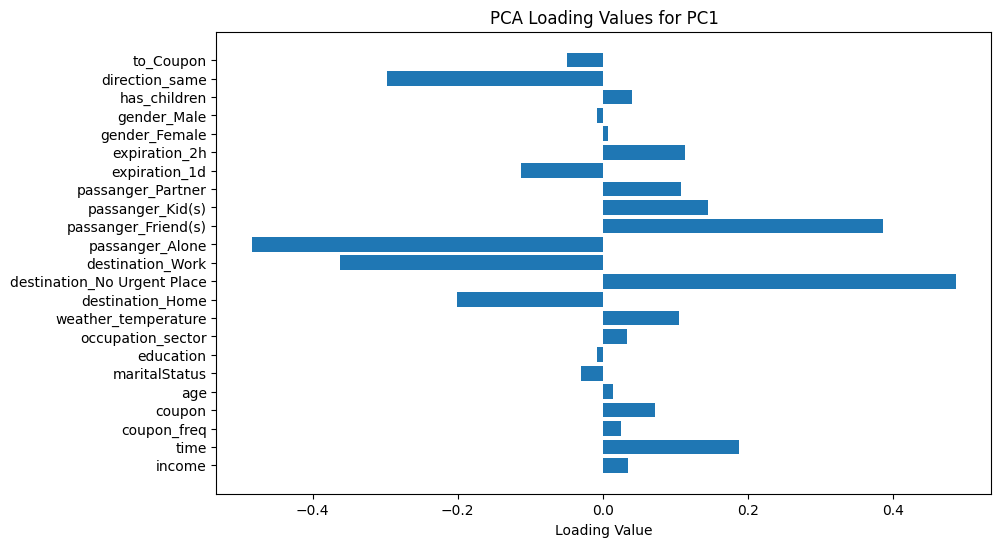

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
income,0.035147,-0.003462,-0.049671,0.028816,-0.377639,-0.087646,-0.393345,-0.025625,-0.060501,-0.229806,0.079447,-0.217680,0.458157,0.358653,0.455795,0.042577
time,0.187932,0.493261,0.197672,-0.183943,-0.068594,0.156863,0.031672,-0.181477,0.057551,-0.021833,0.024892,0.018098,-0.003440,-0.008088,0.023534,0.076383
coupon_freq,0.025921,0.003191,0.034027,0.100207,0.014666,-0.317400,-0.038685,-0.276474,0.562835,-0.276606,-0.488433,-0.098071,0.046281,0.174827,-0.311150,-0.189318
coupon,0.072109,0.070134,0.051222,0.186191,0.030617,-0.376780,0.059961,-0.055911,0.519380,0.011530,0.539147,0.011630,-0.120155,-0.197313,0.225884,0.349226
age,0.013900,0.068612,-0.206190,0.004152,-0.184850,0.023970,0.388491,0.149906,-0.081172,-0.517432,0.233177,-0.113376,-0.368636,0.434827,-0.056776,-0.066183
maritalStatus,-0.030081,-0.090010,0.289695,-0.024370,0.400151,0.102814,-0.041898,0.006762,0.065169,0.156803,0.013704,0.026202,-0.353915,0.570024,0.165673,0.080199
education,-0.007267,-0.027405,0.058307,-0.015678,0.165307,0.046839,0.515160,0.232180,0.123362,-0.232594,-0.209342,0.492465,0.414938,-0.002425,0.331421,0.053566
occupation_sector,0.034038,0.013032,-0.099325,0.026456,-0.199896,-0.128338,-0.432339,-0.083725,-0.080962,-0.130916,-0.075154,0.767530,-0.330926,0.039419,0.048595,0.016331
weather_temperature,0.105521,0.093262,0.035222,0.085134,0.082252,-0.482227,0.078047,0.102626,-0.241626,0.239898,0.313467,0.207732,0.355033,0.324318,-0.439275,-0.150910
destination_Home,-0.200459,0.531852,0.191451,-0.102847,-0.078999,0.147554,0.005686,-0.117380,0.046504,0.000258,0.070049,0.077529,0.083953,0.058877,-0.091864,0.029903


In [88]:
from sklearn.decomposition import PCA

# Asumiendo que 'data_scaled' es tu conjunto de datos escalado y 'pca' es tu modelo PCA ajustado
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)

print("Number of components used:", pca.n_components_)
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

# Loadings o cargas de los componentes principales
loadings = pca.components_.T  # Transpuesta para alinear con las variables originales

# Crear un DataFrame para mejor visualización
columns = final_df.drop(columns='Y').columns
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=columns)

# Visualizar los loadings para el primer componente principal
plt.figure(figsize=(10, 6))
plt.barh(columns, loading_matrix['PC1'], align='center')
plt.xlabel('Loading Value')
plt.title('PCA Loading Values for PC1')
plt.show()

# Mostrar la matriz de loadings
loading_matrix

Variance threshold: 0.95
Number of components used: 16
Explained variance ratio: 0.9608506371997417


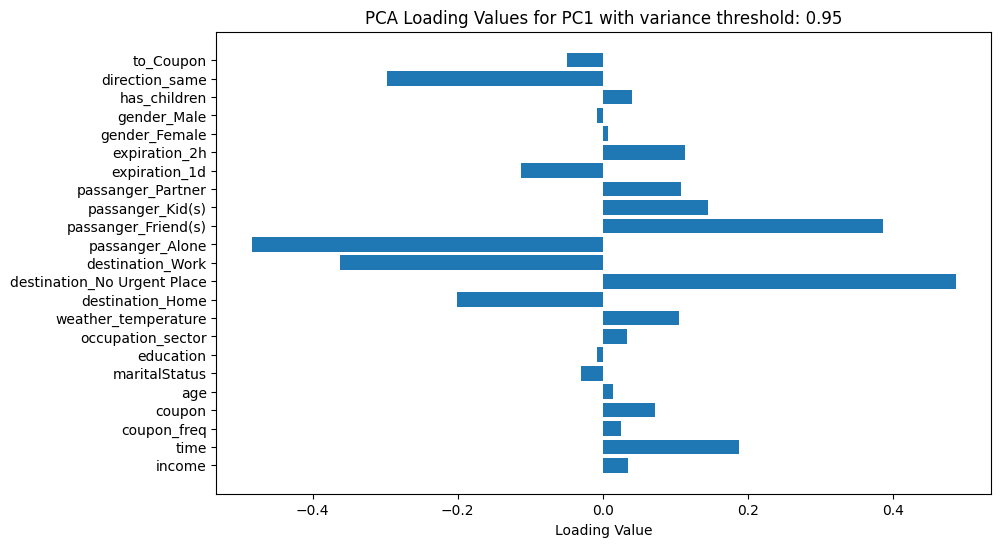

                                  PC1       PC2       PC3       PC4       PC5  \
income                       0.035147 -0.003462 -0.049671  0.028816 -0.377639   
time                         0.187932  0.493261  0.197672 -0.183943 -0.068594   
coupon_freq                  0.025921  0.003191  0.034027  0.100207  0.014666   
coupon                       0.072109  0.070134  0.051222  0.186191  0.030617   
age                          0.013900  0.068612 -0.206190  0.004152 -0.184850   
maritalStatus               -0.030081 -0.090010  0.289695 -0.024370  0.400151   
education                   -0.007267 -0.027405  0.058307 -0.015678  0.165307   
occupation_sector            0.034038  0.013032 -0.099325  0.026456 -0.199896   
weather_temperature          0.105521  0.093262  0.035222  0.085134  0.082252   
destination_Home            -0.200459  0.531852  0.191451 -0.102847 -0.078999   
destination_No Urgent Place  0.487483 -0.139174 -0.021481 -0.069076  0.043031   
destination_Work            

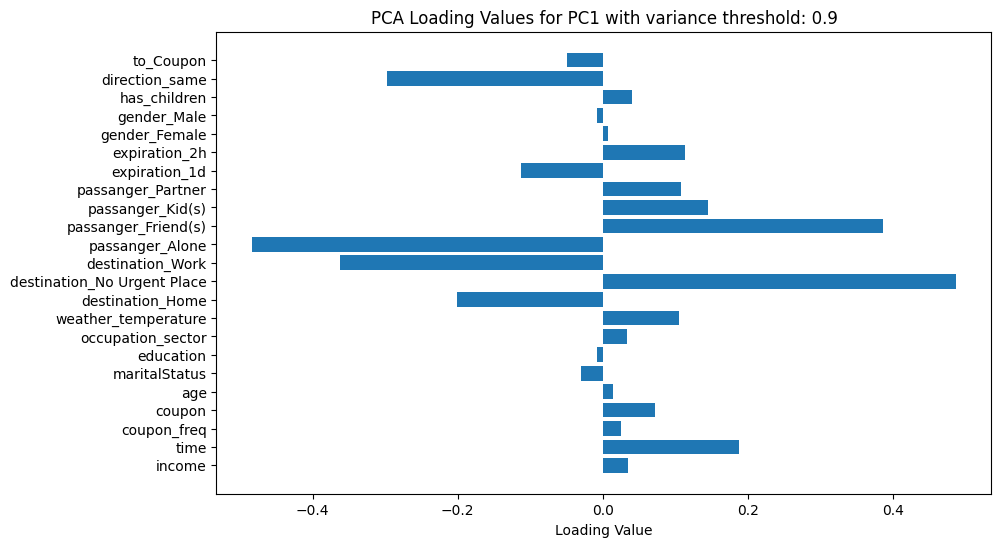

                                  PC1       PC2       PC3       PC4       PC5  \
income                       0.035147 -0.003462 -0.049671  0.028816 -0.377639   
time                         0.187932  0.493261  0.197672 -0.183943 -0.068594   
coupon_freq                  0.025921  0.003191  0.034027  0.100207  0.014666   
coupon                       0.072109  0.070134  0.051222  0.186191  0.030617   
age                          0.013900  0.068612 -0.206190  0.004152 -0.184850   
maritalStatus               -0.030081 -0.090010  0.289695 -0.024370  0.400151   
education                   -0.007267 -0.027405  0.058307 -0.015678  0.165307   
occupation_sector            0.034038  0.013032 -0.099325  0.026456 -0.199896   
weather_temperature          0.105521  0.093262  0.035222  0.085134  0.082252   
destination_Home            -0.200459  0.531852  0.191451 -0.102847 -0.078999   
destination_No Urgent Place  0.487483 -0.139174 -0.021481 -0.069076  0.043031   
destination_Work            

PC1     (destination_No Urgent Place, [0.4874830433213...
PC2     (destination_Home, [-0.20045923689757938, 0.53...
PC3     (gender_Male, [-0.007353639096673909, -0.23076...
PC4     (expiration_2h, [0.1131960311252166, 0.1354816...
PC5     (gender_Female, [0.007353639096673895, 0.23076...
PC6     (to_Coupon, [-0.0487656770831296, -0.213520878...
PC7     (education, [-0.007267371321091928, -0.0274054...
PC8     (passanger_Partner, [0.10742798805190942, 0.03...
PC9     (coupon_freq, [0.02592115377279482, 0.00319132...
PC10    (passanger_Kid(s), [0.1452302897284948, 0.0806...
PC11    (coupon, [0.07210945403226429, 0.0701344277878...
PC12    (occupation_sector, [0.03403840931045548, 0.01...
PC13    (income, [0.035147154917139115, -0.00346232944...
PC14    (maritalStatus, [-0.030080979354610515, -0.090...
dtype: object

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Función para realizar PCA y visualizar resultados
def perform_pca(data_scaled, variance_threshold, final_df):
    # Ajustar el modelo PCA
    pca = PCA(n_components=variance_threshold)
    data_pca = pca.fit_transform(data_scaled)

    # Imprimir el número de componentes y la varianza explicada total
    print("Variance threshold:", variance_threshold)
    print("Number of components used:", pca.n_components_)
    print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

    # Loadings o cargas de los componentes principales
    loadings = pca.components_.T  # Transpuesta para alinear con las variables originales

    # Crear un DataFrame para mejor visualización de los loadings
    columns = final_df.drop(columns='Y').columns  # Asegúrate de ajustar 'Y' si es necesario
    loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=columns)

    # Visualizar los loadings para el primer componente principal
    plt.figure(figsize=(10, 6))
    plt.barh(columns, loading_matrix['PC1'], align='center')
    plt.xlabel('Loading Value')
    plt.title(f'PCA Loading Values for PC1 with variance threshold: {variance_threshold}')
    plt.show()

    # Mostrar la matriz de loadings
    print(loading_matrix)

    # Identificar los principales componentes en cada caso
    top_components = loading_matrix.idxmax().apply(lambda x: (x, loading_matrix.loc[x]))
    print("Top components for each principal component:")
    print(top_components)
    return top_components

# Asumiendo que 'data_scaled' es tu conjunto de datos escalado y 'final_df' es tu DataFrame final
# Llamar a la función para los umbrales de varianza explicada de 0.95 y 0.90
perform_pca(data_scaled, 0.95, final_df)
perform_pca(data_scaled, 0.90, final_df)



Variance threshold: 0.95
Number of components used: 16
Explained variance ratio: 0.9608506371997417
Variance threshold: 0.9
Number of components used: 14
Explained variance ratio: 0.9061349993576083


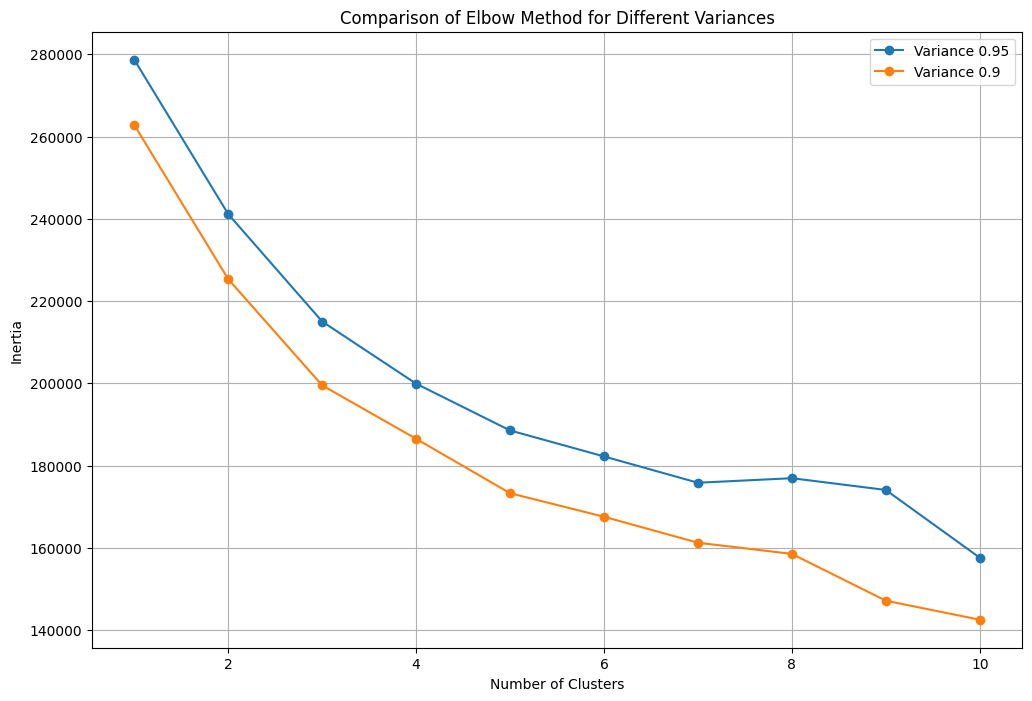

In [90]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def perform_pca_and_clustering(data_scaled, variance_thresholds):
    plt.figure(figsize=(12, 8))

    for variance_threshold in variance_thresholds:
        # Ajustar el modelo PCA con un umbral de varianza explicada
        pca = PCA(n_components=variance_threshold)
        data_pca = pca.fit_transform(data_scaled)

        # Imprimir resultados de PCA
        print(f"Variance threshold: {variance_threshold}")
        print("Number of components used:", pca.n_components_)
        print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

        # Determinar el número óptimo de clusters usando el método del codo
        inertia = []
        k_range = range(1, 11)
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(data_pca)  # Usar los datos reducidos por PCA
            inertia.append(kmeans.inertia_)

        # Graficar el método del codo para cada umbral
        plt.plot(k_range, inertia, marker='o', label=f'Variance {variance_threshold}')

    # Configurar el gráfico
    plt.title('Comparison of Elbow Method for Different Variances')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.legend()
    plt.grid(True)
    plt.show()

# Asumiendo que 'data_scaled' es tu conjunto de datos escalado
# Ejecutar PCA y clustering para ambos umbrales de varianza explicada 0.95 y 0.90
variance_thresholds = [0.95, 0.90]
perform_pca_and_clustering(data_scaled, variance_thresholds)



In [91]:
# Determine the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use PCA-reduced data
    inertia.append(kmeans.inertia_)

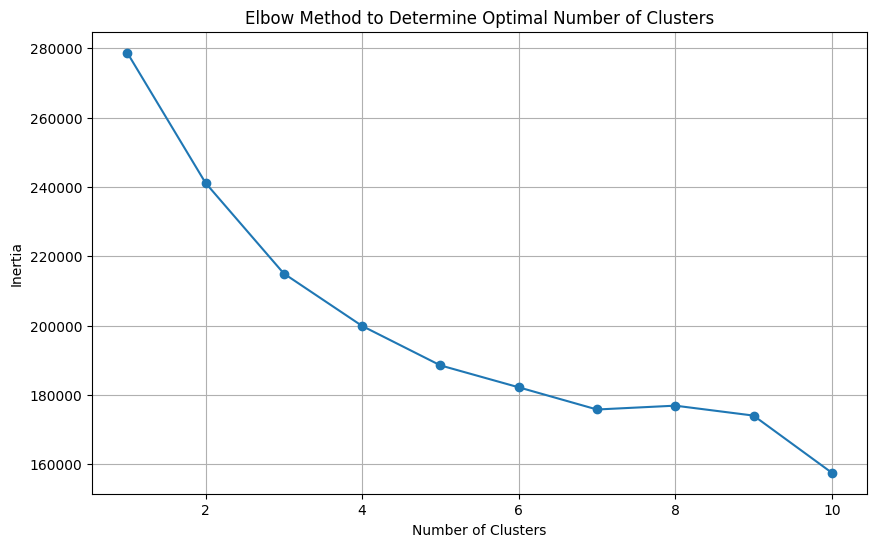

In [92]:
# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [93]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def perform_pca_and_kmeans(data_scaled, variance_threshold):
    # Ajustar el modelo PCA con un umbral de varianza explicada de 0.90
    pca = PCA(n_components=variance_threshold)
    data_pca = pca.fit_transform(data_scaled)

    # Imprimir resultados de PCA
    print(f"Using PCA with variance threshold: {variance_threshold}")
    print("Number of components used:", pca.n_components_)
    print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

    # Realizar clustering con KMeans utilizando el número óptimo de clusters determinado
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(data_pca)  # Usar los datos reducidos por PCA

    # Imprimir los resultados del clustering
    print("Clusters assigned:", clusters)

    return clusters, data_pca

# Asumiendo que 'data_scaled' es tu conjunto de datos escalado
clusters_90, data_pca_90 = perform_pca_and_kmeans(data_scaled, 0.90)
clusters_95, data_pca_95 = perform_pca_and_kmeans(data_scaled, 0.95)

# Opcional: Visualización o análisis posterior


Using PCA with variance threshold: 0.9
Number of components used: 14
Explained variance ratio: 0.9061349993576083
Clusters assigned: [1 2 2 ... 3 3 3]
Using PCA with variance threshold: 0.95
Number of components used: 16
Explained variance ratio: 0.9608506371997417
Clusters assigned: [2 2 2 ... 3 3 3]


In [94]:
# Adding cluster information back to the dataframe for analysis
final_df['Cluster_pca'] = clusters_95

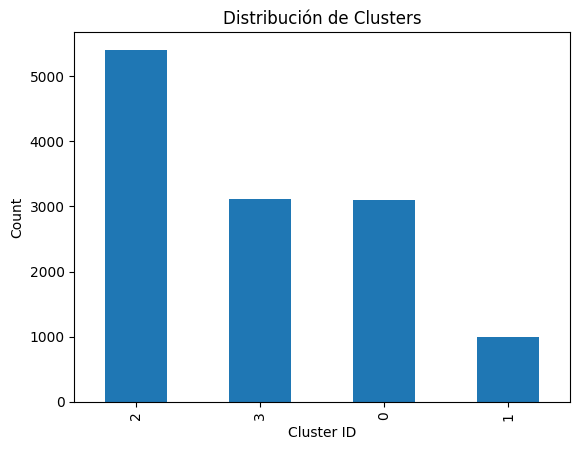

In [95]:
import matplotlib.pyplot as plt

# Visualización de la distribución de clusters
final_df['Cluster_pca'].value_counts().plot(kind='bar')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.title('Distribución de Clusters')
plt.show()


In [96]:
# Analyzing the clusters
cluster_summary = final_df.groupby('Cluster_pca').mean()

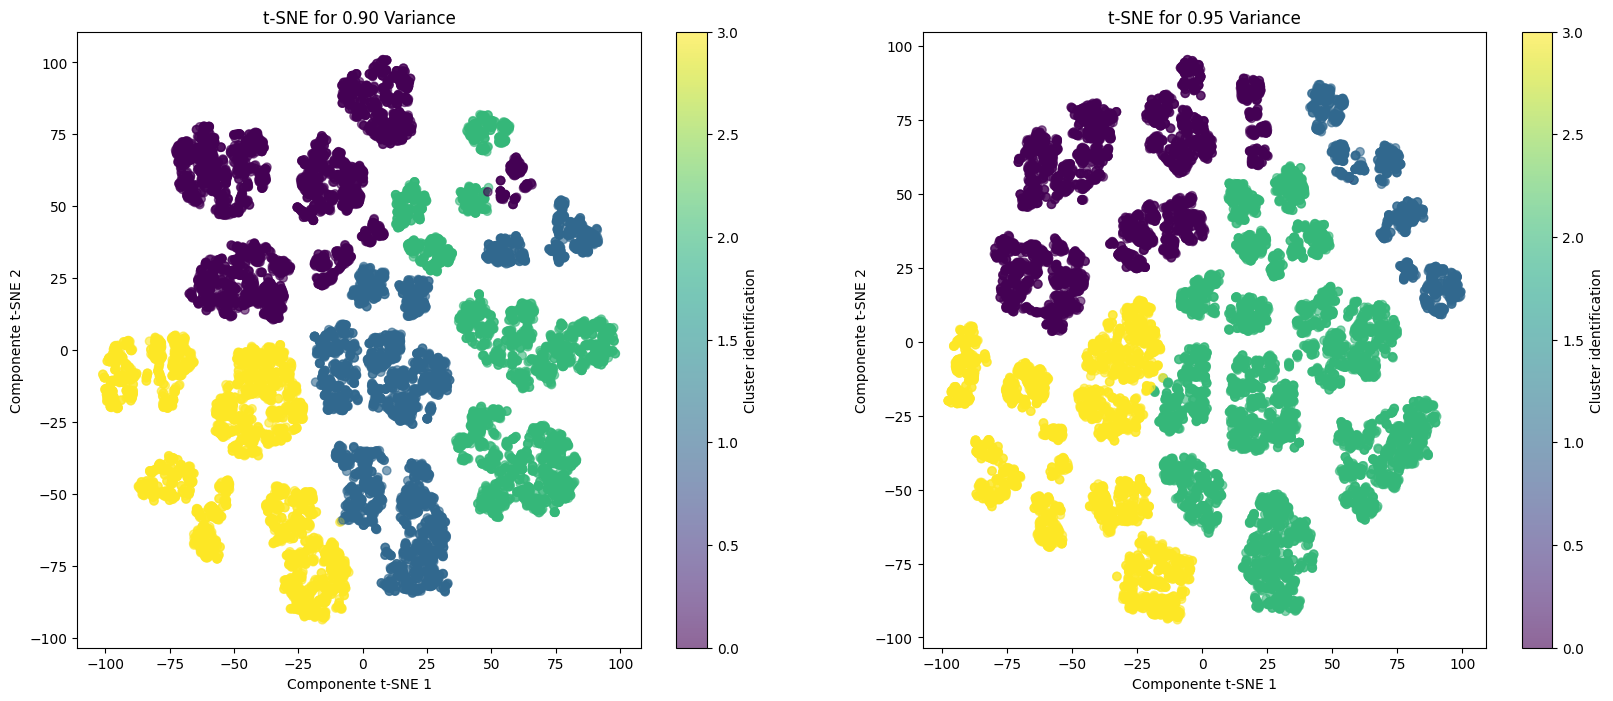

In [98]:
# # Visualize using t-SNE
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)
# data_tsne = tsne.fit_transform(data_pca)
# plt.figure(figsize=(10, 8))
# plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
# plt.title('t-SNE Visualization of Clusters')
# plt.show()

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def perform_tsne_and_plot(data_pca_90, data_pca_95, clusters_90, clusters_95):
    # Configurar la figura para dos subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Configuración para t-SNE con data_pca_90
    tsne_90 = TSNE(n_components=2, random_state=42)
    data_tsne_90 = tsne_90.fit_transform(data_pca_90)
    scatter_90 = axes[0].scatter(data_tsne_90[:, 0], data_tsne_90[:, 1], c=clusters_90, cmap='viridis', alpha=0.6)
    axes[0].set_title('t-SNE for 0.90 Variance')
    axes[0].set_xlabel('Componente t-SNE 1')
    axes[0].set_ylabel('Componente t-SNE 2')
    fig.colorbar(scatter_90, ax=axes[0], label='Cluster identification')

    # Configuración para t-SNE con data_pca_95
    tsne_95 = TSNE(n_components=2, random_state=42)
    data_tsne_95 = tsne_95.fit_transform(data_pca_95)
    scatter_95 = axes[1].scatter(data_tsne_95[:, 0], data_tsne_95[:, 1], c=clusters_95, cmap='viridis', alpha=0.6)
    axes[1].set_title('t-SNE for 0.95 Variance')
    axes[1].set_xlabel('Componente t-SNE 1')
    axes[1].set_ylabel('Componente t-SNE 2')
    fig.colorbar(scatter_95, ax=axes[1], label='Cluster identification')

    # Mostrar el gráfico
    plt.show()

# Suponiendo que 'data_pca_90' y 'data_pca_95' son tus conjuntos de datos reducidos por PCA
# y 'clusters_90' y 'clusters_95' son las etiquetas de clustering obtenidas
# Llamar a la función para visualizar ambos
perform_tsne_and_plot(data_pca_90, data_pca_95, clusters_90, clusters_95)


In [99]:
final_df.columns

Index(['income', 'time', 'coupon_freq', 'coupon', 'age', 'maritalStatus',
       'education', 'occupation_sector', 'weather_temperature',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'expiration_1d', 'expiration_2h', 'gender_Female',
       'gender_Male', 'has_children', 'direction_same', 'to_Coupon', 'Y',
       'Cluster_pca'],
      dtype='object')

In [100]:
X = final_df.drop(['Cluster_pca', 'Y'], axis = 1)

In [101]:

correlation_matrix = X.corrwith(final_df['Cluster_pca'])

# Ordena las correlaciones de mayor a menor
correlation_sorted = correlation_matrix.abs().sort_values(ascending=False)

# Imprime las correlaciones ordenadas
print("Correlations with the variable 'cluster':")
print(correlation_sorted)

Correlations with the variable 'cluster':
destination_Home               0.874543
time                           0.767410
destination_Work               0.690714
passanger_Kid(s)               0.181414
passanger_Friend(s)            0.175130
destination_No Urgent Place    0.167765
direction_same                 0.160754
to_Coupon                      0.152030
has_children                   0.061254
weather_temperature            0.046065
passanger_Partner              0.043718
maritalStatus                  0.032760
passanger_Alone                0.031757
coupon_freq                    0.024220
gender_Male                    0.018221
gender_Female                  0.018221
age                            0.015017
education                      0.012782
income                         0.006664
expiration_1d                  0.004318
expiration_2h                  0.004318
occupation_sector              0.004182
coupon                         0.000030
dtype: float64


In [102]:
umbral_correlacion = 0.05
correlaciones_superiores = correlation_sorted[correlation_sorted > umbral_correlacion]
columnas_seleccionadas = correlaciones_superiores.index.tolist()
print('Selected columns with PCA: ', columnas_seleccionadas)
df_filt = final_df[columnas_seleccionadas]

Selected columns with PCA:  ['destination_Home', 'time', 'destination_Work', 'passanger_Kid(s)', 'passanger_Friend(s)', 'destination_No Urgent Place', 'direction_same', 'to_Coupon', 'has_children']


### Original dataset Clustering

In [103]:
X.columns

Index(['income', 'time', 'coupon_freq', 'coupon', 'age', 'maritalStatus',
       'education', 'occupation_sector', 'weather_temperature',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'expiration_1d', 'expiration_2h', 'gender_Female',
       'gender_Male', 'has_children', 'direction_same', 'to_Coupon'],
      dtype='object')

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

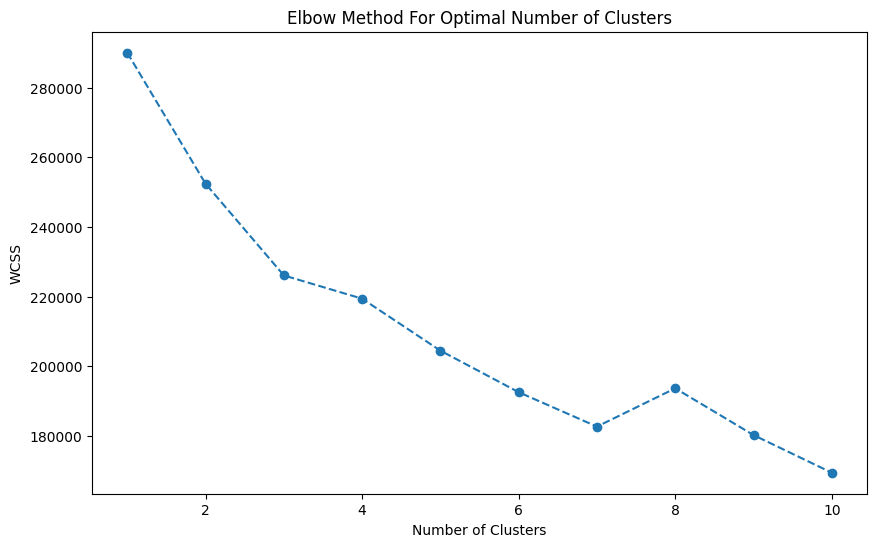

In [105]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [106]:
optimal_clusters = 5
kmeans_original = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_original = kmeans_original.fit_predict(X_scaled)

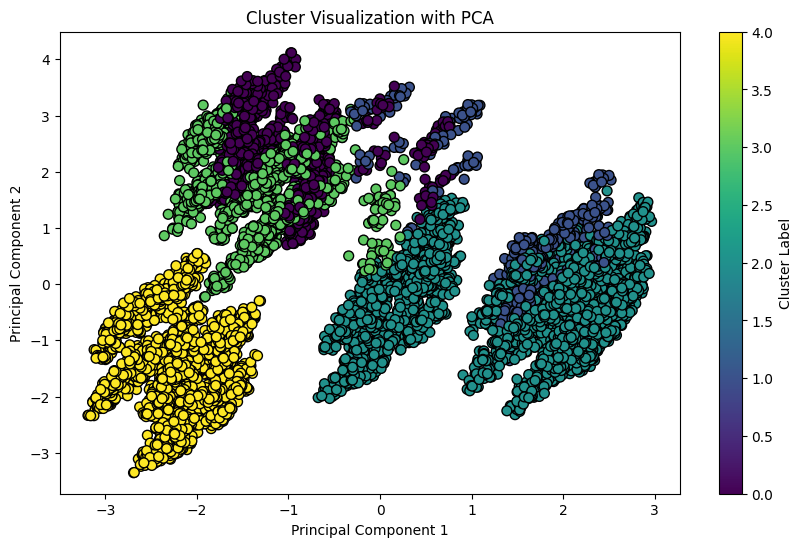

In [107]:
# Visualizacion de los clusters con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_original, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster Label')
plt.show()

Clustering comparation:


In [108]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

ari = adjusted_rand_score(clusters_original, clusters_95)
ami = adjusted_mutual_info_score(clusters_original, clusters_95)
homogeneity = homogeneity_score(clusters_original, clusters_95)
completeness = completeness_score(clusters_original, clusters_95)
v_measure = v_measure_score(clusters_original, clusters_95)

# Print the results
print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Adjusted Mutual Information (AMI): {ami}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-measure: {v_measure}')

Adjusted Rand Index (ARI): 0.9296220637709169
Adjusted Mutual Information (AMI): 0.9371041036888762
Homogeneity: 0.8820805083674809
Completeness: 0.9995000081690356
V-measure: 0.9371264929357425


We see very high values in the metrics, which implies consistency between both clustering strategies. Because of this, it is decided to continue with the clustering performed on the original data to maintain some interpretability. However, the variable selection performed with PCA will be taken into account for the selection of variables to obtain the models.

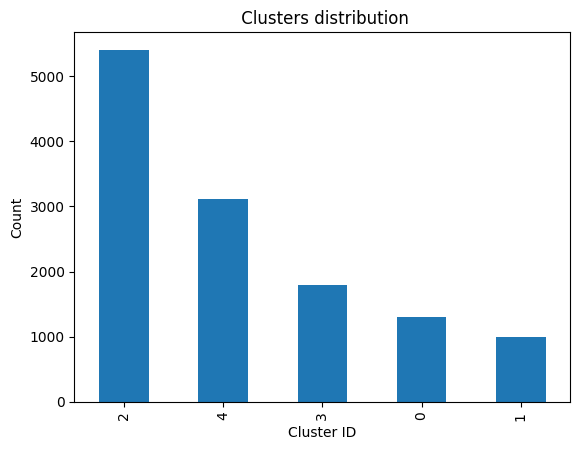

In [110]:
final_df['Cluster_orig'] = clusters_original
import matplotlib.pyplot as plt

# Visualización de la distribución de clusters
final_df['Cluster_orig'].value_counts().plot(kind='bar')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.title(' Clusters distribution')
plt.show()

In [111]:
X = final_df.drop(['Cluster_orig', 'Cluster_pca', 'Y'], axis = 1)

correlation_matrix = X.corrwith(final_df['Cluster_orig'])

# Ordena las correlaciones de mayor a menor
correlation_sorted = correlation_matrix.abs().sort_values(ascending=False)

# Imprime las correlaciones ordenadas
print("Correlations with 'cluster_orig':")
print(correlation_sorted)
umbral_correlacion = 0.05
correlaciones_superiores = correlation_sorted[correlation_sorted > umbral_correlacion]
columnas_seleccionadas = correlaciones_superiores.index.tolist()
print('Selected columns: ', columnas_seleccionadas)
df_filt = final_df[columnas_seleccionadas]

Correlations with 'cluster_orig':
destination_Work               0.771478
time                           0.621326
destination_No Urgent Place    0.397154
passanger_Alone                0.378419
expiration_1d                  0.334687
expiration_2h                  0.334687
passanger_Kid(s)               0.324138
destination_Home               0.307249
passanger_Friend(s)            0.170489
direction_same                 0.152649
to_Coupon                      0.136804
has_children                   0.100618
passanger_Partner              0.088226
coupon                         0.087523
weather_temperature            0.084657
maritalStatus                  0.052746
income                         0.034450
age                            0.024692
education                      0.021374
occupation_sector              0.018241
gender_Female                  0.018028
gender_Male                    0.018028
coupon_freq                    0.012449
dtype: float64
Selected columns:  ['destinatio

Selected variables:

- With PCA: ['destination_Home', 'time', 'destination_Work', 'passanger_Kid(s)', 'passanger_Friend(s)', 'destination_No Urgent Place', 'direction_same', 'to_Coupon', 'has_children']
- Without PCA: ['destination_Work', 'time', 'destination_No Urgent Place', 'passanger_Alone', 'expiration_2h', 'expiration_1d', 'passanger_Kid(s)', 'destination_Home', 'passanger_Friend(s)', 'direction_same', 'to_Coupon', 'has_children', 'passanger_Partner', 'coupon', 'weather_temperature', 'maritalStatus']

# Dataset division

In [112]:
final_df.columns

Index(['income', 'time', 'coupon_freq', 'coupon', 'age', 'maritalStatus',
       'education', 'occupation_sector', 'weather_temperature',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'expiration_1d', 'expiration_2h', 'gender_Female',
       'gender_Male', 'has_children', 'direction_same', 'to_Coupon', 'Y',
       'Cluster_pca', 'Cluster_orig'],
      dtype='object')

In [113]:
# separating our independent and dependent variable
X = final_df.copy()
X.drop(['Cluster_pca', 'Y'], axis=1, inplace=True)
y = df["Y"]

In [114]:
X.shape

(12610, 24)

In [115]:
y.shape

(12610,)

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest. Variable importance.

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7045995241871531
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1106
           1       0.72      0.77      0.74      1416

    accuracy                           0.70      2522
   macro avg       0.70      0.70      0.70      2522
weighted avg       0.70      0.70      0.70      2522



## Importancia de las variables con RF

                Feature  Importance
2           coupon_freq    0.166920
0                income    0.135721
4                   age    0.114620
6             education    0.084991
3                coupon    0.077683
5         maritalStatus    0.064690
8   weather_temperature    0.049992
7     occupation_sector    0.046515
1                  time    0.042162
22            to_Coupon    0.039222
20         has_children    0.028289
18        gender_Female    0.020542
19          gender_Male    0.020169
21       direction_same    0.015418
16        expiration_1d    0.015128


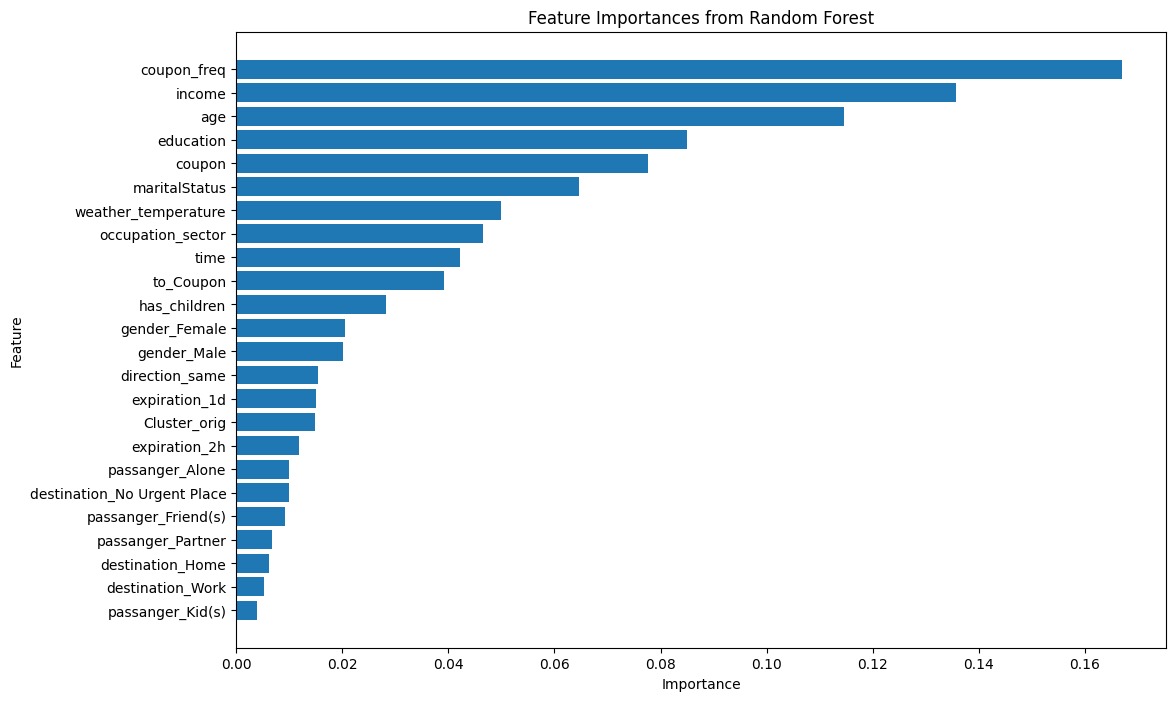

In [120]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar la importancia de las variables
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_15_features = feature_importance_df.head(15)['Feature'].tolist()

print(feature_importance_df.head(15))

# Graficar la importancia de las variables
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [121]:
top_15_features

['coupon_freq',
 'income',
 'age',
 'education',
 'coupon',
 'maritalStatus',
 'weather_temperature',
 'occupation_sector',
 'time',
 'to_Coupon',
 'has_children',
 'gender_Female',
 'gender_Male',
 'direction_same',
 'expiration_1d']

- With PCA: ['destination_Home', 'time', 'destination_Work', 'passanger_Kid(s)', 'passanger_Friend(s)', 'destination_No Urgent Place', 'direction_same', 'to_Coupon', 'has_children']
- Without PCA: ['destination_Work', 'time', 'destination_No Urgent Place', 'passanger_Alone', 'expiration_2h', 'expiration_1d', 'passanger_Kid(s)', 'destination_Home', 'passanger_Friend(s)', 'direction_same', 'to_Coupon', 'has_children', 'passanger_Partner', 'coupon', 'weather_temperature', 'maritalStatus']
- With RF: ['coupon_freq', 'income', 'age', 'education', 'coupon', 'maritalStatus', 'weather_temperature', 'occupation_sector', 'time', 'to_Coupon', 'has_children', 'gender_Female', 'gender_Male', 'Cluster_orig', 'direction_same']

To make the final selection of variables we take into account the three approaches.

In [ ]:
from collections import Counter

# Listas obtenidas por los tres métodos
pca_features = ['destination_Home', 'time', 'destination_Work', 'passanger_Kid(s)', 'passanger_Friend(s)', 'destination_No Urgent Place', 'direction_same', 'to_Coupon', 'has_children']
non_pca_features = ['destination_Work', 'time', 'destination_No Urgent Place', 'passanger_Alone', 'expiration_2h', 'expiration_1d', 'passanger_Kid(s)', 'destination_Home', 'passanger_Friend(s)', 'direction_same', 'to_Coupon', 'has_children', 'passanger_Partner', 'coupon', 'weather_temperature', 'maritalStatus']
rf_features = ['coupon_freq', 'income', 'age', 'education', 'coupon', 'maritalStatus', 'weather_temperature', 'occupation_sector', 'time', 'to_Coupon', 'has_children', 'gender_Female', 'gender_Male', 'Cluster_orig', 'direction_same']

# Combinar todas las características en una sola lista
all_features = pca_features + non_pca_features + rf_features

# Contar la frecuencia de cada característica
feature_counts = Counter(all_features)

# Obtener las 15 características más comunes
most_common_features = feature_counts.most_common(15)
selected_features = [feature for feature, count in most_common_features]

print("Selected Features:", selected_features)


Selected Features: ['time', 'direction_same', 'to_Coupon', 'has_children', 'destination_Home', 'destination_Work', 'passanger_Kid(s)', 'passanger_Friend(s)', 'destination_No Urgent Place', 'coupon', 'weather_temperature', 'maritalStatus', 'passanger_Alone', 'expiration_2h', 'expiration_1d']


# NN_1

In [122]:
X_selected = X[top_15_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construir la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=len(selected_features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar la red neuronal
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {accuracy}')

# Predecir en el conjunto de prueba
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Evaluar el modelo de red neuronal
classification_rep_nn = classification_report(y_test, y_pred_nn)

print('Neural Network Classification Report:')
print(classification_rep_nn)


Epoch 1/50
1009/1009 [==============================] - 6s 4ms/step - loss: 0.6085 - accuracy: 0.6710 - val_loss: 0.5992 - val_accuracy: 0.6761
Epoch 2/50
1009/1009 [==============================] - 3s 3ms/step - loss: 0.5788 - accuracy: 0.7043 - val_loss: 0.5896 - val_accuracy: 0.6852
Epoch 3/50
1009/1009 [==============================] - 3s 3ms/step - loss: 0.5659 - accuracy: 0.7145 - val_loss: 0.5931 - val_accuracy: 0.6883
Epoch 4/50
1009/1009 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7221 - val_loss: 0.5890 - val_accuracy: 0.6963
Epoch 5/50
1009/1009 [==============================] - 3s 3ms/step - loss: 0.5475 - accuracy: 0.7258 - val_loss: 0.5922 - val_accuracy: 0.6927
Epoch 6/50
1009/1009 [==============================] - 4s 4ms/step - loss: 0.5402 - accuracy: 0.7326 - val_loss: 0.5805 - val_accuracy: 0.6951
Epoch 7/50
1009/1009 [==============================] - 2s 2ms/step - loss: 0.5307 - accuracy: 0.7380 - val_loss: 0.5905 - val_accuracy:

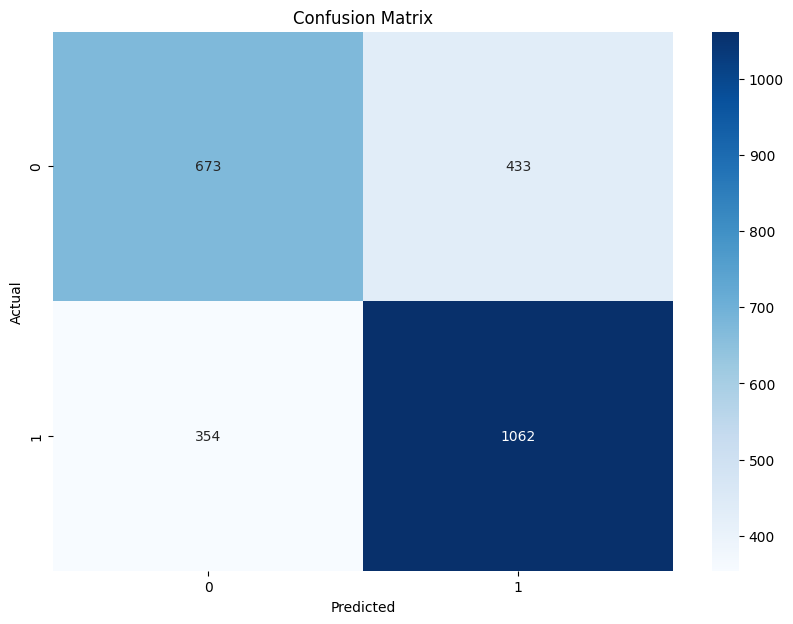

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

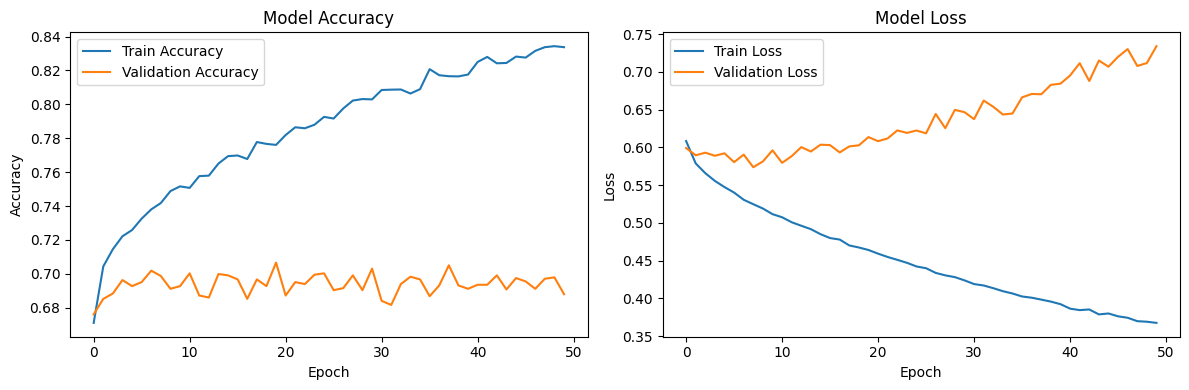

In [ ]:
plt.figure(figsize=(12, 4))

# Gráfico de la precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Gráfico de la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

La precisión de la validación no mejora y es inestable, además su loss crece. No está generalizando bien. Se añade dropout de 0.5 y se estudia la tasa de aprendizaje con un factor de reducción de 0.1

Epoch 1/100
316/316 [==============================] - 3s 5ms/step - loss: 0.6706 - accuracy: 0.5901 - val_loss: 0.6254 - val_accuracy: 0.6606 - lr: 0.0010
Epoch 2/100
316/316 [==============================] - 2s 5ms/step - loss: 0.6272 - accuracy: 0.6626 - val_loss: 0.6125 - val_accuracy: 0.6669 - lr: 0.0010
Epoch 3/100
316/316 [==============================] - 3s 10ms/step - loss: 0.6180 - accuracy: 0.6720 - val_loss: 0.6094 - val_accuracy: 0.6713 - lr: 0.0010
Epoch 4/100
316/316 [==============================] - 2s 6ms/step - loss: 0.6078 - accuracy: 0.6812 - val_loss: 0.6018 - val_accuracy: 0.6832 - lr: 0.0010
Epoch 5/100
316/316 [==============================] - 2s 6ms/step - loss: 0.6007 - accuracy: 0.6890 - val_loss: 0.5970 - val_accuracy: 0.6824 - lr: 0.0010
Epoch 6/100
316/316 [==============================] - 2s 7ms/step - loss: 0.5998 - accuracy: 0.6897 - val_loss: 0.5963 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 7/100
316/316 [==============================] - 2s 7ms/s

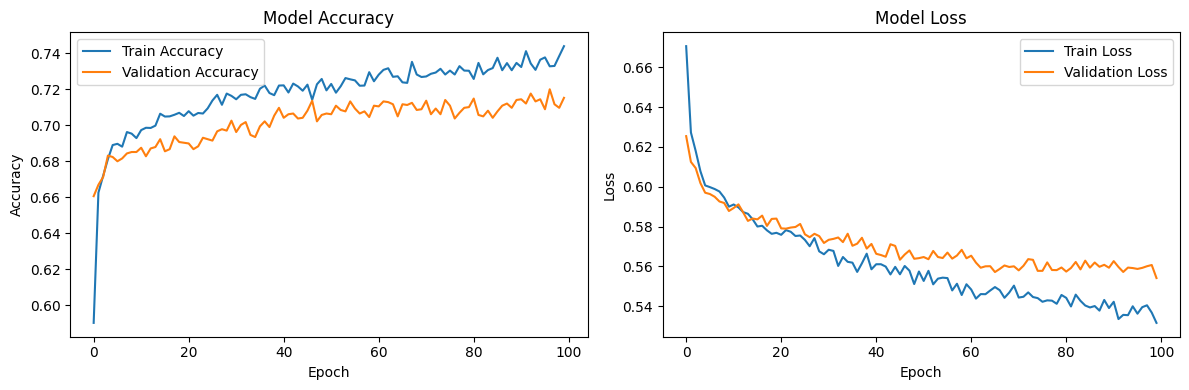

Epoch 1/100
316/316 [==============================] - 3s 5ms/step - loss: 0.7058 - accuracy: 0.5522 - val_loss: 0.6676 - val_accuracy: 0.5916 - lr: 0.0010
Epoch 2/100
316/316 [==============================] - 2s 5ms/step - loss: 0.6628 - accuracy: 0.5969 - val_loss: 0.6462 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 3/100
316/316 [==============================] - 1s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6380 - val_accuracy: 0.6455 - lr: 0.0010
Epoch 4/100
316/316 [==============================] - 1s 5ms/step - loss: 0.6381 - accuracy: 0.6436 - val_loss: 0.6236 - val_accuracy: 0.6614 - lr: 0.0010
Epoch 5/100
316/316 [==============================] - 1s 3ms/step - loss: 0.6345 - accuracy: 0.6497 - val_loss: 0.6191 - val_accuracy: 0.6642 - lr: 0.0010
Epoch 6/100
316/316 [==============================] - 1s 3ms/step - loss: 0.6288 - accuracy: 0.6581 - val_loss: 0.6163 - val_accuracy: 0.6661 - lr: 0.0010
Epoch 7/100
316/316 [==============================] - 1s 3ms/st

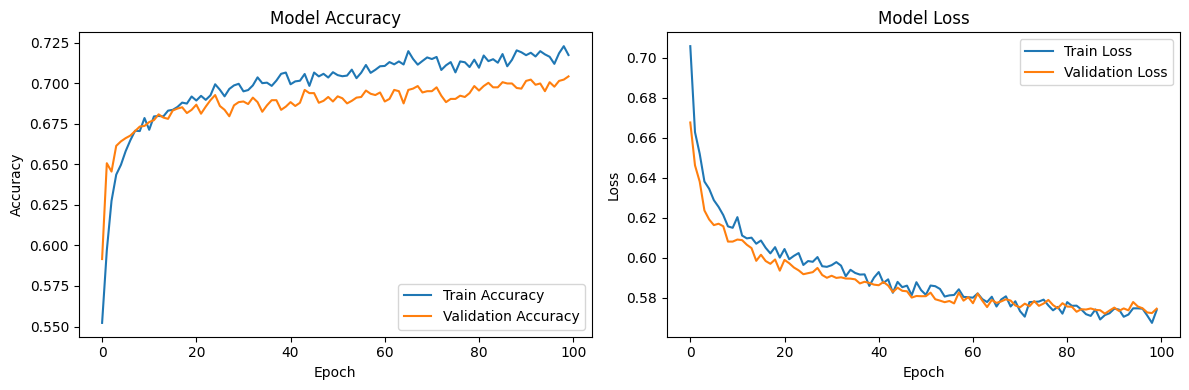

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

dropout = [0.3, 0.5]

for dropout in dropout:

  model = Sequential()
  model.add(Dense(64, input_dim=len(selected_features), activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))

  # Compilar el modelo con Adam y reducción de la tasa de aprendizaje
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
  model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

  # Entrenar la red neuronal
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])

  # Evaluar el modelo
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Neural Network Accuracy: {accuracy}')

  # Predecir en el conjunto de prueba
  y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

  # Evaluar el modelo de red neuronal
  classification_rep_nn = classification_report(y_test, y_pred_nn)
  print('Neural Network Classification Report:')
  print(classification_rep_nn)

  plt.figure(figsize=(12, 4))

  # Gráfico de la precisión
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Model Accuracy')

  # Gráfico de la pérdida
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Model Loss')

  plt.tight_layout()
  plt.show()


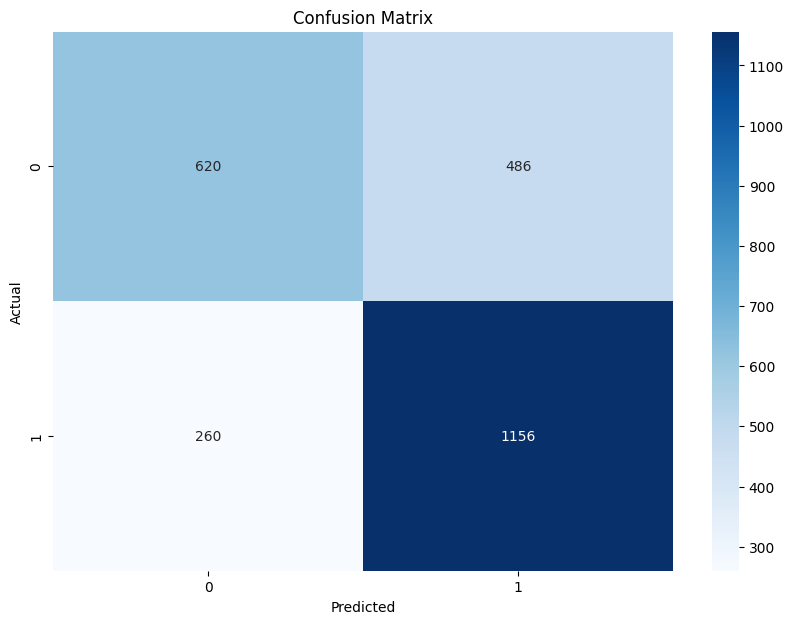

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


Trial 30 Complete [00h 00m 31s]
val_accuracy: 0.6875495910644531

Best val_accuracy So Far: 0.7002379298210144
Total elapsed time: 00h 06m 22s

The optimal dropout rates are: 0.2, 0.2, 0.4.
The optimal learning rate is: 0.004379422199312011.

Epoch 1/100
316/316 [==============================] - 4s 7ms/step - loss: 0.6412 - accuracy: 0.6441 - val_loss: 0.6014 - val_accuracy: 0.6808 - lr: 0.0044
Epoch 2/100
316/316 [==============================] - 1s 3ms/step - loss: 0.6172 - accuracy: 0.6824 - val_loss: 0.6085 - val_accuracy: 0.6717 - lr: 0.0044
Epoch 3/100
316/316 [==============================] - 1s 3ms/step - loss: 0.6124 - accuracy: 0.6921 - val_loss: 0.5991 - val_accuracy: 0.6745 - lr: 0.0044
Epoch 4/100
316/316 [==============================] - 1s 3ms/step - loss: 0.6031 - accuracy: 0.6929 - val_loss: 0.5950 - val_accuracy: 0.6800 - lr: 0.0044
Epoch 5/100
316/316 [==============================] - 1s 3ms/step - loss: 0.6005 - accuracy: 0.6992 - val_loss: 0.5969 - val_accurac

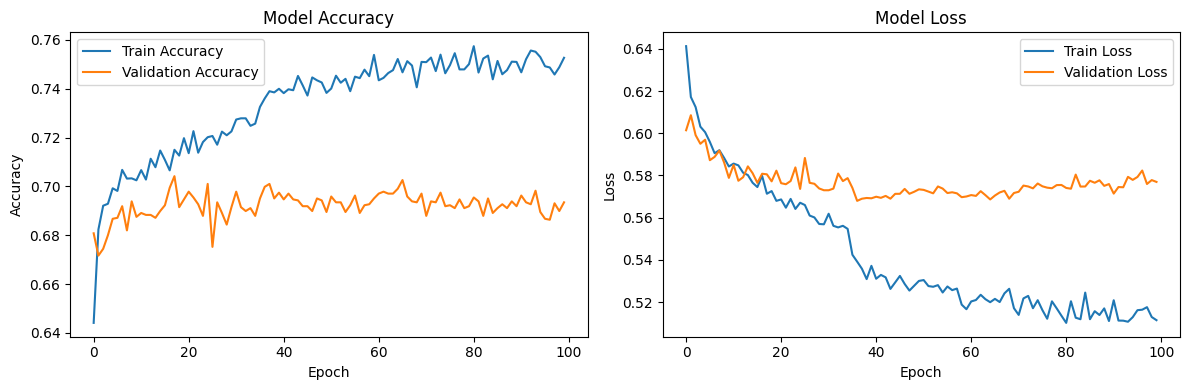

In [ ]:
import kerastuner as kt
from sklearn.utils.class_weight import compute_class_weight


def build_model(hp):
    model = Sequential()
    model.add(Dense(64, input_dim=len(selected_features), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate_3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  metrics=['accuracy'])
    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}

# Perform hypertuning
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[reduce_lr, stop_early], class_weight=class_weights)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal dropout rates are: {best_hps.get('dropout_rate_1')}, {best_hps.get('dropout_rate_2')}, {best_hps.get('dropout_rate_3')}.
The optimal learning rate is: {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr], class_weight=class_weights)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {accuracy}')

# Predict on the test set
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
classification_rep_nn = classification_report(y_test, y_pred_nn)
print('Neural Network Classification Report:')
print(classification_rep_nn)

# Plotting
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


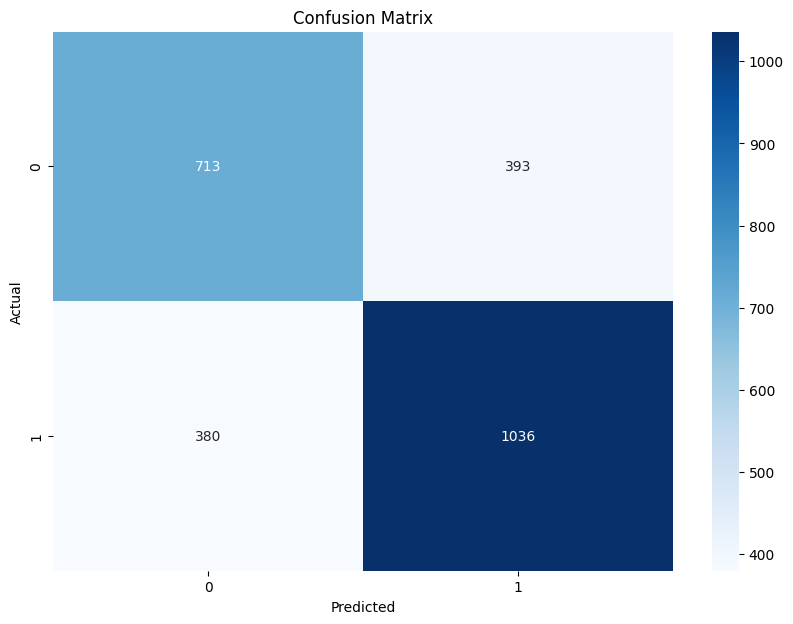

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()